## Obtenci√≥n de datos

## BUSINESS PROBLEM

### **Definici√≥n del problema**

Fleca del Port, una cafeter√≠a degustaci√≥n con productos de alta rotaci√≥n, busca optimizar su planificaci√≥n operativa y estrat√©gica mediante la anticipaci√≥n de sus ventas mensuales. Actualmente, las decisiones relacionadas con compras, personal y producci√≥n se toman de forma reactiva o basadas en intuiciones, lo que puede generar ineficiencias.

El objetivo principal del proyecto es **predecir el volumen de ventas mensual**, utilizando datos hist√≥ricos de ventas y variables externas que puedan influir en la demanda, como:

- Temporadas del a√±o (Semana Santa, verano, etc.).
- Familias de productos (boller√≠a, panader√≠a, bebidas...).
- Condiciones meteorol√≥gicas (especialmente d√≠as de lluvia).
- Festivos y fechas especiales.

### **Objetivo del proyecto**

Construir un modelo de machine learning que permita anticipar con precisi√≥n el importe mensual de ventas, facilitando una mejor toma de decisiones en √°reas clave como:

- Producci√≥n y aprovisionamiento.
- Gesti√≥n de personal.
- Promociones estacionales.

### **Impacto esperado**

- **Reducci√≥n de desperdicio**: Ajuste m√°s preciso de la producci√≥n diaria en base a la demanda esperada.
- **Optimizaci√≥n del stock**: Mejora en la planificaci√≥n de compras, reduciendo excesos o roturas de stock.
- **Toma de decisiones basada en datos**: Apoyo en decisiones estrat√©gicas y operativas con previsiones respaldadas por modelos anal√≠ticos.
- **Mejor planificaci√≥n del equipo**: Adaptaci√≥n de turnos y refuerzos en base a picos esperados de venta.
- **Incremento de rentabilidad**: Ajuste de recursos y acciones promocionales con base en predicciones fiables.

## Definici√≥n de los datos

Para abordar este proyecto se utilizar√°n datos propios del negocio, espec√≠ficamente un hist√≥rico de ventas recopilado durante los √∫ltimos a√±os. Este conjunto de datos contiene informaci√≥n detallada a nivel de producto, familia y fecha, lo cual permitir√° comprender el comportamiento de las ventas y construir un modelo de predicci√≥n robusto y ajustado a la realidad del negocio.

### Fuente de los datos

- **Ubicaci√≥n**: Carpeta `raw/` dentro del proyecto.
- **Formato**: `.parquet`
- **Archivos incluidos**:
  - `row_data_forecasting_2023-2025_02-00000000000000000000.parquet`
  - `row_data_forecasting_2023-2025_02-00000000000000000001.parquet`
  - `row_data_forecasting_2023-2025_02-00000000000000000002.parquet`

Estos archivos forman parte de un √∫nico dataset repartido en bloques, por lo que ser√° necesario combinarlos al cargarlos para su posterior an√°lisis.


### Variables disponibles

El dataset incluye, entre otras, las siguientes variables:

- `fecha`: fecha de la transacci√≥n.
- `num_factura`: n√∫mero de factura asociado a la venta.
- `producto`: nombre o descripci√≥n del producto vendido.
- `familia`: categor√≠a del producto (ej. boller√≠a, panader√≠a...).
- `cantidad`: n√∫mero de unidades vendidas.
- `base_imponible`: importe neto sin impuestos.
- `total`: importe total con impuestos.

### Descripci√≥n general

Estos datos permitir√°n realizar un an√°lisis detallado de la evoluci√≥n temporal de las ventas, identificar patrones estacionales y evaluar el impacto de distintas categor√≠as de productos a lo largo del tiempo. Esta comprensi√≥n ser√° clave para la generaci√≥n de variables explicativas y la mejora de la precisi√≥n del modelo predictivo.

### Consideraciones

- Los datos se almacenar√°n localmente en la carpeta `/data` del proyecto.
- Se llevar√° a cabo un proceso de limpieza y an√°lisis exploratorio (EDA) previo al modelado.
- Algunos registros pueden contener valores faltantes o inconsistencias que deber√°n ser identificados y tratados adecuadamente antes de entrenar el modelo.




**Carga de datos**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google'

In [ ]:
from google.colab import drive
import pandas as pd
import glob

# Montar Google Drive
drive.mount('/content/drive')

# Ruta donde se encuentran los archivos en Google Drive (ajusta la ruta seg√∫n tu estructura)
folder_path = "/content/drive/MyDrive/jordiquiroga.com/Workspace/mlops_project/data/raw/"  # Reemplaza con la ubicaci√≥n real

# Obtener lista de archivos .parquet en la carpeta
file_list = glob.glob(folder_path + "*.parquet")

# Cargar y unir los archivos en un solo DataFrame
df = pd.concat([pd.read_parquet(file) for file in file_list], ignore_index=True)

# Mostrar las primeras filas del DataFrame
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


fecha n_factura                producto     familia  cantidad  \
0  2024-01-10  T/112704         2 CHURROS HORNO    BOLLERIA       1.0   
1  2024-01-10  T/112704         2 CHURROS HORNO    BOLLERIA       1.0   
2  2024-01-10  T/112691  7 CEREALES BUT. BLANCA  BOCADILLOS       1.0   
3  2024-01-07  T/112299  7 CEREALES BUT. BLANCA  BOCADILLOS       1.0   
4  2024-01-05  T/112051  7 CEREALES BUT. BLANCA  BOCADILLOS       1.0   

   base_imponible  total  
0            1.18    1.3  
1            1.18    1.3  
2            2.18    2.4  
3            2.18    2.4  
4            2.18    2.4

In [3]:
# Revisar la estructura y tipos de datos
df.info()

# Ver estad√≠sticas descriptivas de las columnas num√©ricas
df.describe()

# Comprobar valores nulos en el dataset
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295979 entries, 0 to 295978
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fecha           295979 non-null  object 
 1   n_factura       295979 non-null  object 
 2   producto        295979 non-null  object 
 3   familia         295978 non-null  object 
 4   cantidad        295979 non-null  float64
 5   base_imponible  293732 non-null  float64
 6   total           293732 non-null  float64
dtypes: float64(3), object(4)
memory usage: 15.8+ MB
fecha                0
n_factura            0
producto             0
familia              1
cantidad             0
base_imponible    2247
total             2247
dtype: int64


In [4]:
# Verificar valores nulos por columna en los datos originales
print("Valores nulos en los datos originales (df):")
print(df.isnull().sum())

# Ver porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos:")
print(df.isnull().mean() * 100)



Valores nulos en los datos originales (df):
fecha                0
n_factura            0
producto             0
familia              1
cantidad             0
base_imponible    2247
total             2247
dtype: int64

Porcentaje de valores nulos:
fecha             0.000000
n_factura         0.000000
producto          0.000000
familia           0.000338
cantidad          0.000000
base_imponible    0.759175
total             0.759175
dtype: float64


# **Identificar en qu√© meses y categor√≠as se encuentran los valores nulos**

Para tomar una decisi√≥n informada sobre c√≥mo imputar o eliminar los valores nulos, necesitamos responder dos preguntas clave:

**1. ¬øEn qu√© meses ocurren los valores nulos?**

Si los valores nulos est√°n en per√≠odos espec√≠ficos, podr√≠amos imputarlos con la media m√≥vil o interpolaci√≥n.
Si hay meses completos sin datos, podr√≠amos evaluar si eliminarlos o imputarlos con el promedio de otros a√±os.

**2. ¬øEn qu√© categor√≠as ocurren los valores nulos?**

Si ciertos productos o categor√≠as tienen valores nulos, podr√≠amos usar la media de esa categor√≠a en lugar de una imputaci√≥n global.
Si los nulos afectan productos con pocas ventas, podr√≠amos simplemente eliminarlos.

In [5]:
df['fecha'] = pd.to_datetime(df['fecha'])


**Identificamos en qu√© meses hay valores nulos**

In [6]:
# Ver cu√°ntos valores nulos hay por mes
df_nulos_mes = df[df.isnull().any(axis=1)].groupby(df['fecha'].dt.to_period("M")).size()

# Mostrar los meses con valores nulos
print("Valores nulos por mes:")
print(df_nulos_mes)



Valores nulos por mes:
fecha
2023-11    2247
2024-04       1
Freq: M, dtype: int64


**Identificamos en qu√© cat√©gor√≠as hay valores nulos**

In [7]:
# Ver cu√°ntos valores nulos hay por categor√≠a
df_nulos_categoria = df[df.isnull().any(axis=1)].groupby("familia").size()

# Mostrar las categor√≠as con valores nulos
print("\nValores nulos por categor√≠a:")
print(df_nulos_categoria)



Valores nulos por categor√≠a:
familia
A√ëADIDOS             11
BEBIDA               98
BEBIDAS              87
BOCADILLOS          329
BOLLERIA            426
CAFES               872
CERVEZAS             24
LICORES               8
PAN                 260
PASTELERIA           55
TES & INFUSIONES     44
TOSTADAS             21
VARIOS               12
dtype: int64


# An√°lisis de los valores nulos encontrados
Con los resultados, vemos las siguientes observaciones clave:

**1. Los valores nulos est√°n concentrados en noviembre de 2023 (2247 registros)**

Esto podr√≠a deberse a un problema de carga de datos o falta de registros en ese mes.
Necesitamos decidir si imputamos esos valores o si hay una justificaci√≥n para descartarlos.

**2. Un solo valor nulo en abril de 2024**

Este √∫nico caso no es problem√°tico y podr√≠amos simplemente eliminarlo sin afectar el an√°lisis.

**3. Valores nulos en m√∫ltiples categor√≠as**

Las categor√≠as con m√°s valores nulos son:
CAF√âS (872 registros)
BOLLER√çA (426 registros)
BOCADILLOS (329 registros)
PAN (260 registros)
Esto indica que las ventas de estos productos no se registraron correctamente en noviembre de 2023.


---



**Posibles Estrategias de Imputaci√≥n**

Dado que los valores nulos est√°n concentrados en un mes y afectan muchas categor√≠as, tenemos tres estrategias posibles:

1. Imputaci√≥n con la media de meses anteriores
Si asumimos que noviembre de 2023 sigue la misma estacionalidad que otros a√±os, podemos imputar con el promedio de noviembre 2022 O noviembre 2024 (si ya hay datos de 2024).


```
# df.loc[df['fecha'].dt.to_period("M") == "2023-11", 'total'] = df[df['fecha'].dt.to_period("M").isin(["2022-11", "2024-11"])]['total'].mean()

```


2. Imputaci√≥n con interpolaci√≥n temporal
Si queremos suavizar la serie, podemos interpolar los valores nulos bas√°ndonos en los meses anteriores y posteriores.



```
# df['total'] = df['total'].interpolate(method='linear')

```

3. Imputaci√≥n espec√≠fica por categor√≠a (Este es el que veo mejor)
Si las categor√≠as tienen estacionalidades distintas, podemos imputar usando el promedio de cada categor√≠a en meses cercanos.



```
# df['total'] = df.groupby(["familia", df['fecha'].dt.to_period("M")])['total'].transform(lambda x: x.fillna(x.mean()))

```




**Imputamos los valores nulos**

Dado que tenemos un mes entero con valores nulos, la mejor opci√≥n es imputar primero y luego detectar outliers.
As√≠ evitamos que los datos faltantes distorsionen la detecci√≥n de valores at√≠picos.

Vamos a rellenar los valores nulos utilizando la media de la categor√≠a en meses cercanos, de la siguiente manera:

1. Para cada categor√≠a con valores nulos, buscamos el promedio de las ventas en octubre y diciembre de 2023 (los meses m√°s cercanos).

2. Si la categor√≠a no tiene datos en esos meses, usamos la media de todo el a√±o 2023.

3. Aplicamos la imputaci√≥n y verificamos que no queden valores nulos.

In [ ]:
# Identificar los meses cercanos a noviembre 2023
meses_cercanos = ["2023-10", "2023-12"]

# Convertir a formato Periodo (mes-a√±o) para facilitar la agrupaci√≥n
df['mes'] = df['fecha'].dt.to_period("M")

# Imputar valores nulos usando la media de la categor√≠a en meses cercanos
for categoria in df['familia'].unique():
    for mes in meses_cercanos:
        # Filtrar la media de la categor√≠a en los meses cercanos
        media_categoria = df[(df['familia'] == categoria) & (df['mes'] == mes)]['total'].mean()

        # Rellenar valores nulos solo en noviembre 2023 de esa categor√≠a
        df.loc[(df['familia'] == categoria) & (df['mes'] == "2023-11") & (df['total'].isnull()), 'total'] = media_categoria

# Si sigue habiendo valores nulos, usar la media anual de la categor√≠a en 2023
df.loc[df['mes'] == "2023-11", 'total'] = df.groupby("familia")['total'].transform(lambda x: x.fillna(x.mean()))

# Verificar si quedan valores nulos
print("Valores nulos despu√©s de la imputaci√≥n:")
print(df.isnull().sum())


Valores nulos despu√©s de la imputaci√≥n:
fecha                0
n_factura            0
producto             0
familia              1
cantidad             0
base_imponible    2247
total                0
mes                  0
dtype: int64


In [9]:
# Imputar valores nulos en base_imponible usando la media de la categor√≠a en meses cercanos
for categoria in df['familia'].unique():
    for mes in meses_cercanos:
        # Filtrar la media de la categor√≠a en los meses cercanos
        media_base_categoria = df[(df['familia'] == categoria) & (df['mes'] == mes)]['base_imponible'].mean()

        # Rellenar valores nulos solo en noviembre 2023 de esa categor√≠a
        df.loc[(df['familia'] == categoria) & (df['mes'] == "2023-11") & (df['base_imponible'].isnull()), 'base_imponible'] = media_base_categoria

# Si sigue habiendo valores nulos, usar la media anual de la categor√≠a en 2023
df.loc[df['mes'] == "2023-11", 'base_imponible'] = df.groupby("familia")['base_imponible'].transform(lambda x: x.fillna(x.mean()))

# Verificar si quedan valores nulos
print("Valores nulos despu√©s de la imputaci√≥n en base_imponible:")
print(df.isnull().sum())



Valores nulos despu√©s de la imputaci√≥n en base_imponible:
fecha             0
n_factura         0
producto          0
familia           1
cantidad          0
base_imponible    0
total             0
mes               0
dtype: int64


**Eliminamos la Fila con Valores Nulos de Abril 2024 y para la columna familia**

In [10]:
# Eliminar cualquier fila que tenga un valor nulo en cualquier columna
df = df.dropna()

# Verificar que ya no haya valores nulos
print("Valores nulos despu√©s de eliminar la fila con nulos restantes:")
print(df.isnull().sum())



Valores nulos despu√©s de eliminar la fila con nulos restantes:
fecha             0
n_factura         0
producto          0
familia           0
cantidad          0
base_imponible    0
total             0
mes               0
dtype: int64


# Detecci√≥n de Outliers en las Ventas

Usaremos tres m√©todos complementarios para identificar valores at√≠picos:

**1. M√©todo de Cuartiles (IQR - Rango Intercuart√≠lico)**  

Identifica valores fuera del rango esperado (Q1 - 1.5 * IQR y Q3 + 1.5 * IQR).

**2.  M√©todo de Boxplot**

Visualiza los outliers con un gr√°fico de caja.

**3. M√©todo de Z-Score**

Identifica valores con m√°s de 2 o 3 desviaciones est√°ndar de la media.

In [11]:
# Calcular cuartiles y IQR en los datos en bruto
Q1 = df['total'].quantile(0.25)
Q3 = df['total'].quantile(0.75)
IQR = Q3 - Q1

# Definir umbrales de outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Filtrar outliers en los datos en bruto
outliers_iqr = df[(df['total'] < umbral_inferior) | (df['total'] > umbral_superior)]

# Mostrar los outliers detectados
print("Outliers detectados con IQR en los datos en bruto:")
print(outliers_iqr.head())



Outliers detectados con IQR en los datos en bruto:
         fecha n_factura                producto     familia  cantidad  \
96  2024-01-30  T/115351  7 CEREALES BUT. BLANCA  BOCADILLOS       2.0   
195 2024-01-09  T/112621      7 CEREALS FORMATGE  BOCADILLOS       2.0   
196 2024-01-24  T/114503      7 CEREALS FORMATGE  BOCADILLOS       2.0   
197 2024-03-08  T/120494      7 CEREALS FORMATGE  BOCADILLOS       2.0   
198 2024-02-21  T/118248      7 CEREALS FORMATGE  BOCADILLOS       2.0   

     base_imponible  total      mes  
96             4.64    5.1  2024-01  
195            4.36    4.8  2024-01  
196            4.64    5.1  2024-01  
197            4.64    5.1  2024-03  
198            4.64    5.1  2024-02  


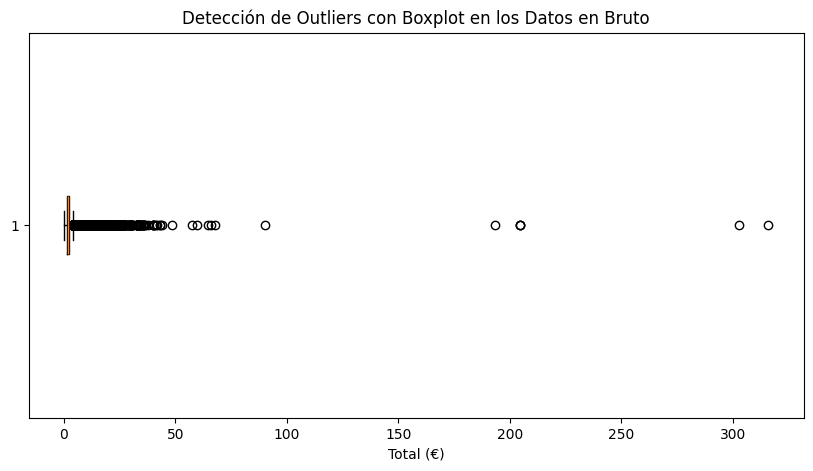

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.boxplot(df['total'], vert=False)
plt.xlabel("Total (‚Ç¨)")
plt.title("Detecci√≥n de Outliers con Boxplot en los Datos en Bruto")
plt.show()



In [13]:
from scipy.stats import zscore
import numpy as np

# Calcular Z-Score para la columna de total en los datos en bruto
df['z_score'] = zscore(df['total'])

# Filtrar outliers con umbral de 3 desviaciones est√°ndar
outliers_zscore = df[np.abs(df['z_score']) > 3]

# Mostrar los outliers detectados
print("Outliers detectados con Z-Score en los datos en bruto:")
print(outliers_zscore[['fecha', 'familia', 'producto', 'total', 'z_score']].head())


Outliers detectados con Z-Score en los datos en bruto:
          fecha     familia            producto  total   z_score
1823 2024-03-05  BOCADILLOS               BACON  10.00  4.143185
1877 2024-03-11  BOCADILLOS  BACON AMB FORMATGE   9.60  3.931044
1878 2024-03-16  BOCADILLOS  BACON AMB FORMATGE   9.60  3.931044
1879 2024-02-03  BOCADILLOS  BACON AMB FORMATGE  14.40  6.476725
3663 2024-03-10  PASTELERIA        BANDA FRUITA  20.95  9.950519


**Estrategia para Manejo de Outliers**

Dado que no existen productos de ticket alto en la cafeter√≠a de manera regular, pero s√≠ en Semana Santa y posibles encargos, la mejor estrategia es:

**1. Eliminar outliers extremos que no correspondan a Semana Santa**

Si hay valores mayores a 50‚Ç¨ en meses normales, es probable que sean errores o pedidos excepcionales.

**2. Conservar valores altos en Semana Santa**

Si las ventas elevadas corresponden a marzo/abril (cuando ocurre Semana Santa), podemos mantenerlas.

**3. Revisar transacciones de m√°s de 100‚Ç¨ en cualquier mes**

Si encontramos valores mayores a 100‚Ç¨ fuera de Semana Santa, investigamos si son tickets leg√≠timos o errores.

In [15]:
# Definir los festivos (1 de enero y 25 de diciembre)
festivos = ['2023-01-01', '2023-12-25', '2024-01-01', '2024-12-25', '2025-01-01']
festivos = pd.to_datetime(festivos)

# Definir rango de Semana Santa (asumimos una duraci√≥n t√≠pica)
semana_santa_2023 = pd.date_range('2023-04-02', '2023-04-09')
semana_santa_2024 = pd.date_range('2024-03-24', '2024-03-31')
semana_santa_2025 = pd.date_range('2025-04-13', '2025-04-20')
semana_santa = semana_santa_2023.union(semana_santa_2024).union(semana_santa_2025)

# Agregar una columna indicando si el mes contiene Semana Santa
df['semana_santa'] = df.index.to_series().apply(lambda x: x in semana_santa)

# Agregar una columna indicando si el mes contiene un festivo
df['festivo'] = df.index.to_series().apply(lambda x: x in festivos)

# Verificar los datos
print(df.head())


       fecha n_factura                producto     familia  cantidad  \
0 2024-01-10  T/112704         2 CHURROS HORNO    BOLLERIA       1.0   
1 2024-01-10  T/112704         2 CHURROS HORNO    BOLLERIA       1.0   
2 2024-01-10  T/112691  7 CEREALES BUT. BLANCA  BOCADILLOS       1.0   
3 2024-01-07  T/112299  7 CEREALES BUT. BLANCA  BOCADILLOS       1.0   
4 2024-01-05  T/112051  7 CEREALES BUT. BLANCA  BOCADILLOS       1.0   

   base_imponible  total      mes   z_score  semana_santa  festivo  
0            1.18    1.3  2024-01 -0.470862         False    False  
1            1.18    1.3  2024-01 -0.470862         False    False  
2            2.18    2.4  2024-01  0.112523         False    False  
3            2.18    2.4  2024-01  0.112523         False    False  
4            2.18    2.4  2024-01  0.112523         False    False  


In [16]:


# Marcar si una transacci√≥n pertenece a Semana Santa
df['es_semana_santa'] = df['fecha'].isin(semana_santa)

# Eliminar valores extremos solo si NO son de Semana Santa
df_filtrado = df[~((df['total'] > 50) & (df['es_semana_santa'] == False))]

# Verificar la cantidad de registros eliminados
print(f"Registros eliminados por ser outliers fuera de Semana Santa: {df.shape[0] - df_filtrado.shape[0]}")

# Mantener el dataset limpio
df = df_filtrado.drop(columns=['es_semana_santa'])


Registros eliminados por ser outliers fuera de Semana Santa: 6


In [17]:
import pandas as pd

# Asegurar que 'fecha' sea tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'])

# Agregar ventas a nivel mensual
df_monthly = df.groupby(df['fecha'].dt.to_period("M"))[['total']].sum()

# Convertir el √≠ndice a DatetimeIndex para evitar problemas con statsmodels
df_monthly.index = df_monthly.index.to_timestamp()

# Renombrar la columna para mayor claridad
df_monthly.rename(columns={'total': 'ventas_mensuales'}, inplace=True)

# Verificar que los datos est√©n correctos
print(df_monthly.head())



            ventas_mensuales
fecha                       
2023-01-01          20361.41
2023-02-01          17444.14
2023-03-01          21301.03
2023-04-01          28905.01
2023-05-01          25389.64


In [22]:
df_monthly.to_csv('ventas_mensuales.csv', index=True)

**An√°lisis de Autocorrelaci√≥n de las Ventas Mensuales**

Vamos a calcular y visualizar la funci√≥n de autocorrelaci√≥n (ACF) para entender si las ventas tienen una dependencia temporal significativa.

1. Graficaremos la Autocorrelaci√≥n (ACF) para ver la relaci√≥n entre las ventas de distintos meses.
2. Graficaremos la Autocorrelaci√≥n Parcial (PACF) para identificar qu√© rezagos influyen directamente en las ventas futuras.
3. Si hay fuerte autocorrelaci√≥n en los primeros rezagos, la regresi√≥n lineal no ser√° la mejor opci√≥n y consideraremos modelos como SARIMA.

<Figure size 1200x500 with 0 Axes>

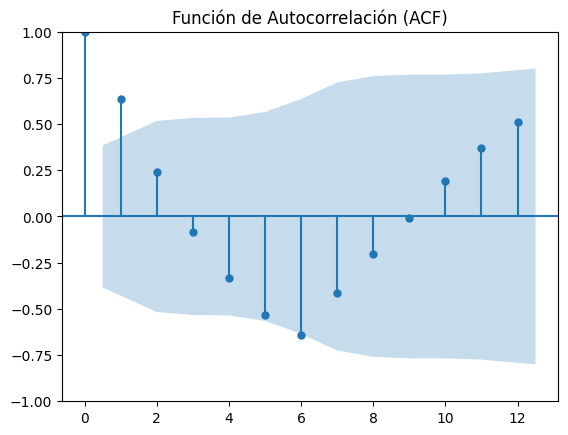

<Figure size 1200x500 with 0 Axes>

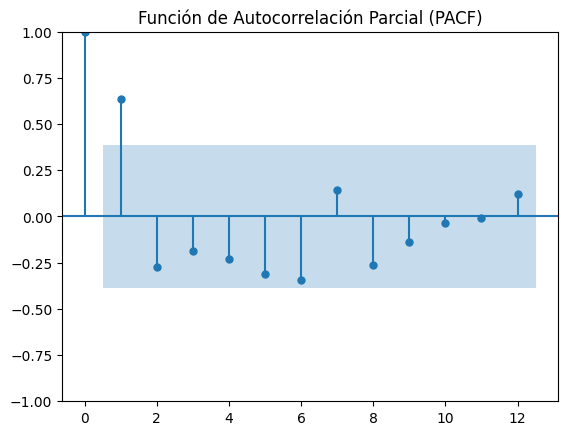

In [18]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar la Autocorrelaci√≥n (ACF)
plt.figure(figsize=(12, 5))
plot_acf(df_monthly['ventas_mensuales'], lags=12, title="Funci√≥n de Autocorrelaci√≥n (ACF)")
plt.show()

# Graficar la Autocorrelaci√≥n Parcial (PACF)
plt.figure(figsize=(12, 5))
plot_pacf(df_monthly['ventas_mensuales'], lags=12, title="Funci√≥n de Autocorrelaci√≥n Parcial (PACF)")
plt.show()


**Interpretaci√≥n de la Autocorrelaci√≥n (ACF y PACF)**

**Autocorrelaci√≥n (ACF)**

Observando las gr√°ficas, podemos extraer las siguientes conclusiones clave:

1. Los primeros rezagos (1 y 2 meses) tienen una fuerte correlaci√≥n positiva (> 0.5).

2. La autocorrelaci√≥n cae lentamente en rezagos m√°s lejanos, lo que indica dependencia temporal significativa.

¬øQu√© significa esto?

* Las ventas de un mes est√°n fuertemente influenciadas por los meses anteriores.
* La regresi√≥n lineal podr√≠a no capturar bien este patr√≥n porque no modela la dependencia temporal.
* SARIMA o modelos autorregresivos podr√≠an ser m√°s adecuados.

**Autocorrelaci√≥n Parcial (PACF)**

1. Hay una fuerte correlaci√≥n en el rezago 1 (~0.6), lo que indica que las ventas de un mes est√°n influenciadas principalmente por el mes anterior.

2. Los rezagos posteriores tienen menor impacto, pero no desaparecen completamente.

¬øQu√© significa esto?

* El rezago 1 es el m√°s importante, lo que indica que podemos probar un modelo AR(1) antes de considerar algo m√°s complejo.
* SARIMA puede modelar este comportamiento de manera m√°s precisa que la regresi√≥n lineal.

Dado que la serie tiene fuerte autocorrelaci√≥n, la regresi√≥n lineal no es el modelo m√°s adecuado.
üìå Mejor alternativa: Probar primero SARIMA antes que la regresi√≥n lineal.

# An√°lisis de la tendencia de ventas

**An√°lisis de la evoluci√≥n de las ventas**

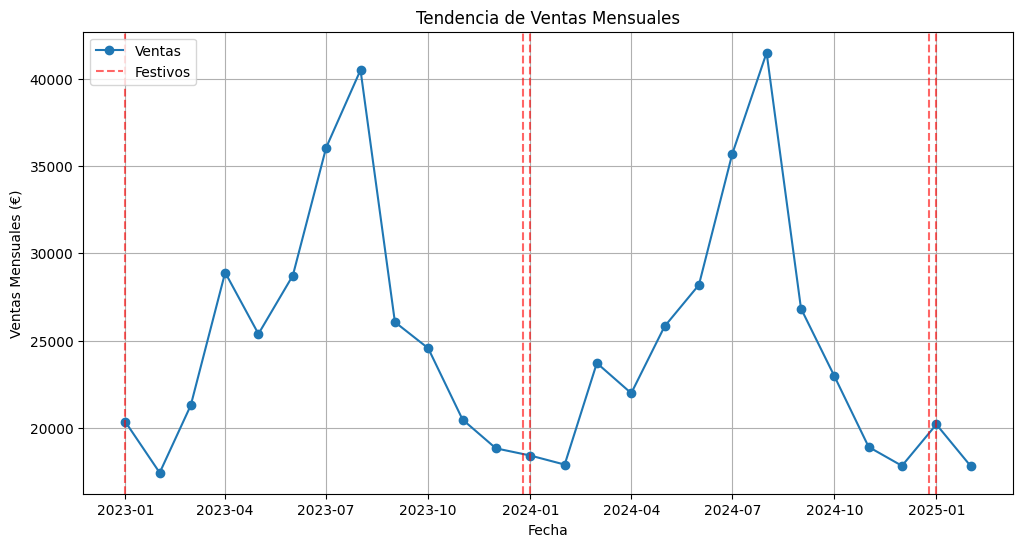

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], marker='o', linestyle='-')

# Marcar festivos en la gr√°fica
for fecha in festivos:
    plt.axvline(fecha, color='red', linestyle='--', alpha=0.6, label="Festivo" if fecha == festivos[0] else "")

plt.xlabel('Fecha')
plt.ylabel('Ventas Mensuales (‚Ç¨)')
plt.title('Tendencia de Ventas Mensuales')
plt.legend(['Ventas', 'Festivos'])
plt.grid()
plt.show()


**An√°lisis de la Tendencia de Ventas**

Observando la gr√°fica, podemos notar algunos patrones clave:

**1. Tendencia anual c√≠clica** üìàüìâ

Se observa un patr√≥n de crecimiento sostenido hasta el tercer trimestre de cada a√±o, seguido por una ca√≠da pronunciada en los √∫ltimos meses del a√±o.
Esto sugiere que las ventas tienen una fuerte estacionalidad con picos en meses espec√≠ficos.

**2. Efecto de los festivos **üéÑ

Las l√≠neas rojas (festivos) parecen coincidir con ca√≠das en las ventas, lo que confirma que los d√≠as 1 de enero y 25 de diciembre impactan negativamente las ventas.

**3. Picos en ciertos per√≠odos** üìä

Semana Santa no est√° resaltada en la gr√°fica, pero podr√≠amos esperar un aumento en esos meses. Vamos a verificar si los meses de marzo/abril muestran un comportamiento at√≠pico.

Tambi√©n vemos picos en los meses de verano, lo cual podr√≠a estar relacionado con un aumento en el turismo o productos de temporada.


**Pr√≥ximo Paso: Descomposici√≥n de la Serie Temporal**

Para confirmar que la estacionalidad es clara y que podemos modelarla, realizaremos una descomposici√≥n de la serie en tendencia, estacionalidad y residuo. Esto nos ayudar√° a decidir el mejor modelo de forecasting.

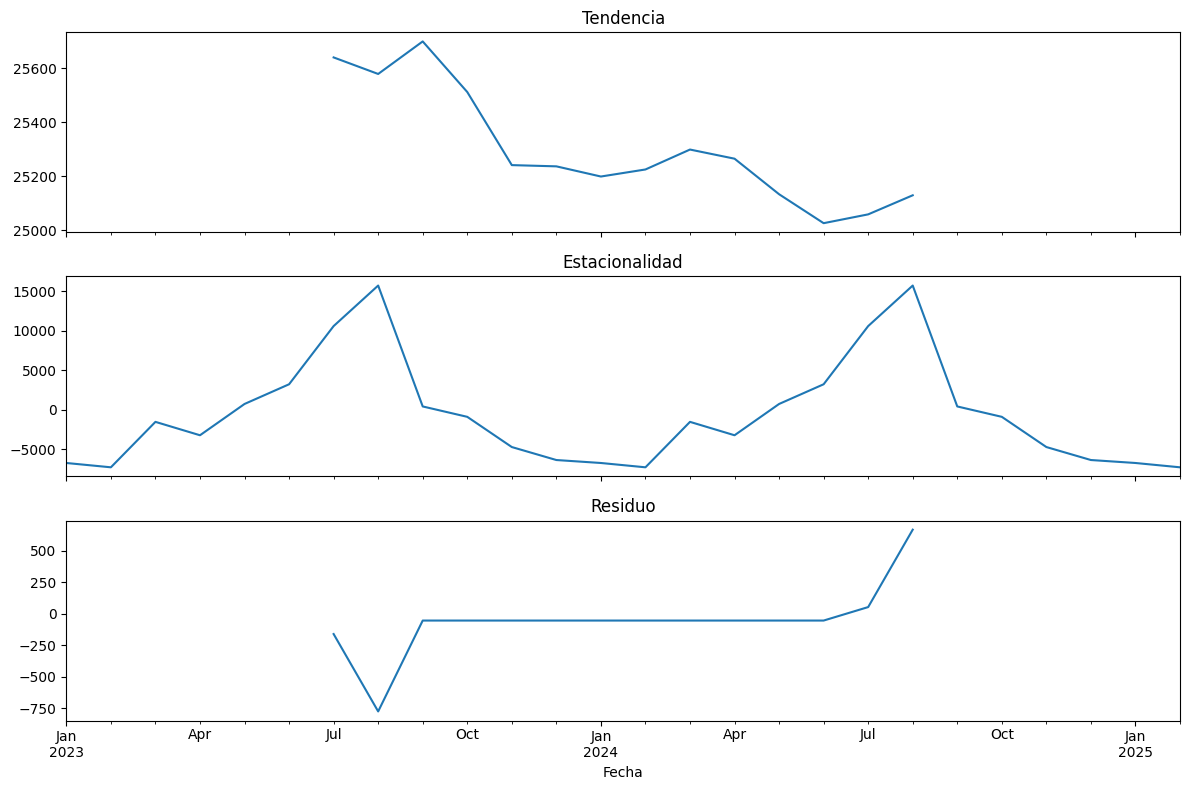

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie de tiempo
decomposition = seasonal_decompose(df_monthly['ventas_mensuales'], model='additive', period=12)

# Graficar los componentes
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

decomposition.trend.plot(ax=axes[0], title="Tendencia")
decomposition.seasonal.plot(ax=axes[1], title="Estacionalidad")
decomposition.resid.plot(ax=axes[2], title="Residuo")

plt.xlabel("Fecha")
plt.tight_layout()
plt.show()


**An√°lisis de la Descomposici√≥n de la Serie Temporal**

Se observa un patr√≥n anual claro: los valores suben hasta mitad de a√±o (verano) y luego bajan, lo cual sugiere estacionalidad fuerte probablemente por comportamiento del consumidor (establecimiento en zona tur√≠stica).


**1. Tendencia** üìà

Hay una tendencia ligeramente descendente desde mediados de 2023 hasta mediados de 2024, y luego una leve recuperaci√≥n.

Se observan per√≠odos de ca√≠da y recuperaci√≥n, lo que indica posibles fluctuaciones estacionales.

**2. Estacionalidad** üîÑ

El patr√≥n estacional es claro y repetitivo:

* Aumenta significativamente en los meses de verano (junio-agosto).

* Disminuye en los primeros y √∫ltimos meses del a√±o.

* El comportamiento estacional parece consistente entre a√±os, lo cual es muy √∫til para el forecasting.

**3. Residuo ‚ö†Ô∏è**

* El residuo es bastante bajo, lo que indica que la mayor parte de la variabilidad est√° explicada por la tendencia y la estacionalidad.

* No se observan outliers fuertes ni variaciones abruptas que rompan el modelo

‚úÖ Conclusi√≥n

La serie es **altamente estacional y predecible**, con una leve tendencia negativa y residuos bajos. Es una muy buena candidata para modelos de forecasting basados en componentes como SARIMA, Prophet o modelos de ML con features temporales

**An√°lisis de la Evoluci√≥n de Ventas por Categor√≠a**

El objetivo es conocer c√≥mo influyen las categor√≠as en las ventas generales, ya que nos puede dar informaci√≥n clave para futuras mejoras del modelo.

Razones para hacer este an√°lisis:
* Nos ayuda a entender si algunas categor√≠as impulsan la estacionalidad de las ventas.
* Podemos identificar productos o familias clave que afectan los patrones de demanda.
* Nos permite decidir si en el futuro queremos modelar ventas por categor√≠a, en lugar de solo ventas totales.

**An√°lisis de las ventas por categor√≠as**

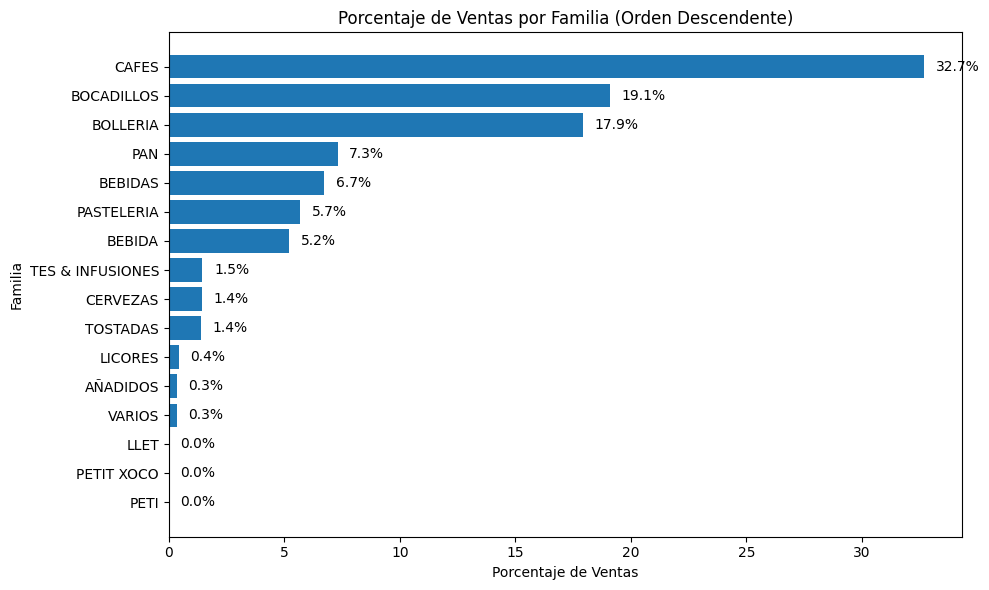

In [29]:
#  Calcular las ventas totales por familia
ventas_por_familia = df.groupby('familia')['total'].sum().reset_index()

# Calcular el porcentaje de ventas por familia
ventas_por_familia['porcentaje'] = (ventas_por_familia['total'] / ventas_por_familia['total'].sum()) * 100

#Ordenar el DataFrame por porcentaje de ventas
ventas_por_familia = ventas_por_familia.sort_values(by=['porcentaje'], ascending=True)

# Crear el gr√°fico de barras horizontal
import matplotlib.pyplot as plt

# Crear el gr√°fico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(ventas_por_familia['familia'], ventas_por_familia['porcentaje'])  # Usamos barh para barras horizontales
plt.xlabel('Porcentaje de Ventas')
plt.ylabel('Familia')
plt.title('Porcentaje de Ventas por Familia (Orden Descendente)')

# A√±adir etiquetas con el porcentaje en cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

CAF√âS, BOCADILLOS y BOLLER√çA deben ser monitoreados de cerca, ya que representan el 69% de los ingresos.

<Figure size 1400x600 with 0 Axes>

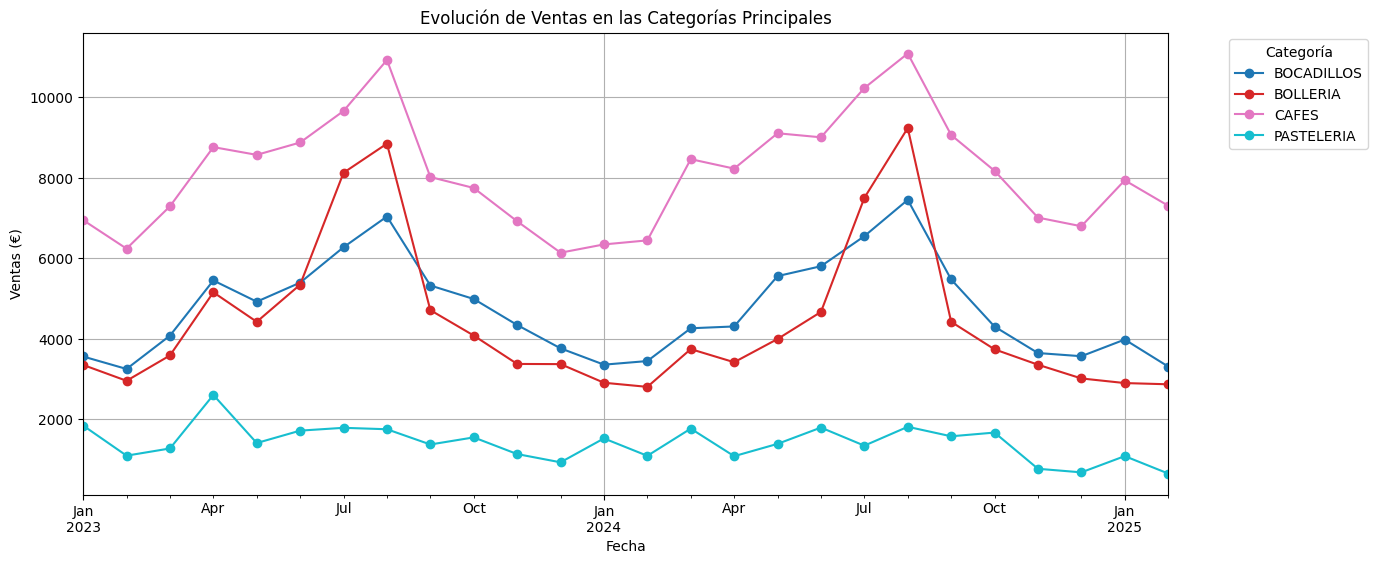

In [30]:
import matplotlib.pyplot as plt

# Seleccionar las principales categor√≠as seg√∫n el an√°lisis previo
categorias_principales = ["CAFES", "BOCADILLOS", "BOLLERIA", "PASTELERIA"]

# Agregar ventas mensuales por categor√≠a
df_categorias_principales = df[df['familia'].isin(categorias_principales)].groupby([df['fecha'].dt.to_period("M"), 'familia'])['total'].sum().unstack()

# Convertir el √≠ndice a DatetimeIndex
df_categorias_principales.index = df_categorias_principales.index.to_timestamp()

# Graficar la evoluci√≥n de ventas por categor√≠a
plt.figure(figsize=(14, 6))
df_categorias_principales.plot(kind="line", marker="o", figsize=(14,6), colormap="tab10")


plt.xlabel("Fecha")
plt.ylabel("Ventas (‚Ç¨)")
plt.title("Evoluci√≥n de Ventas en las Categor√≠as Principales")
plt.legend(title="Categor√≠a", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()



1. Todas las categor√≠as siguen un patr√≥n estacional claro

* Se observa una fuerte subida en primavera y verano, con picos en abril y julio/agosto.
* Luego, las ventas tienden a caer en oto√±o e invierno, especialmente entre noviembre y enero.

2. PASTELER√çA tiene un pico pronunciado en Semana Santa

* Se confirma que en marzo/abril, cuando ocurre Semana Santa, hay un fuerte aumento en ventas.


** Prueba de Estacionariedad (Dickey-Fuller)**



In [31]:
from statsmodels.tsa.stattools import adfuller

# Aplicar la prueba de Dickey-Fuller
result = adfuller(df_monthly['ventas_mensuales'])

# Mostrar los resultados
print("Prueba de Dickey-Fuller:")
print(f"Estad√≠stico ADF: {result[0]}")
print(f"P-valor: {result[1]}")
print("Valores Cr√≠ticos:")
for key, value in result[4].items():
    print(f"{key}: {value}")

# Interpretaci√≥n del resultado
if result[1] < 0.05:
    print("\n‚úÖ La serie es estacionaria (podemos probar ARIMA).")
else:
    print("\n‚ö†Ô∏è La serie NO es estacionaria (necesitamos diferenciaci√≥n o SARIMA).")


Prueba de Dickey-Fuller:
Estad√≠stico ADF: -3.6072555608562116
P-valor: 0.005623822427835475
Valores Cr√≠ticos:
1%: -3.9240193847656246
5%: -3.0684982031250003
10%: -2.67389265625

‚úÖ La serie es estacionaria (podemos probar ARIMA).


# Resumen del An√°lisis y Elecci√≥n del Modelo (ARIMA vs. SARIMA)
Hemos realizado un an√°lisis completo de la serie de ventas de la cafeter√≠a "Fleca del Port". A continuaci√≥n, recapitulamos los puntos clave y justificamos qu√© modelo es el m√°s adecuado.

**Resumen de los An√°lisis Realizados**

1. Exploraci√≥n de los Datos
* Estructura de los datos: Ventas diarias con variables como fecha, familia, producto, total, etc.
* Preprocesamiento: Se agregaron las ventas a nivel mensual (df_monthly).
* Valores nulos: Se imputaron valores por la media de categor√≠as cercanas y se elimin√≥ un √∫nico registro residual.
* Outliers: Se detectaron valores extremos, eliminando solo los fuera de contexto (ej. fuera de Semana Santa).

2. An√°lisis Exploratorio de Datos (EDA)
* Tendencia de ventas: Se identific√≥ un patr√≥n de aumento en primavera y verano, y ca√≠da en oto√±o/invierno.
* An√°lisis por categor√≠a: Se determin√≥ que CAF√âS, BOCADILLOS y BOLLER√çA son los principales motores de ventas, y PASTELER√çA presenta picos en Semana Santa.
* Autocorrelaci√≥n (ACF/PACF): Se observ√≥ una fuerte dependencia temporal entre los meses previos y las ventas actuales.

3. Prueba de Estacionariedad (Dickey-Fuller)
* La serie es estacionaria, ya que la prueba de Dickey-Fuller arroj√≥ un p-valor < 0.05.
* No se requiere diferenciaci√≥n adicional en la tendencia, pero esto NO implica que no haya estacionalidad.

4. An√°lisis de Estacionalidad
* Se identific√≥ una fuerte estacionalidad con picos en Semana Santa y verano.
* ACF mostr√≥ autocorrelaci√≥n en m√∫ltiplos de 12 meses, indicando que la estacionalidad es significativa.

**¬øQu√© Modelo Encaja Mejor? (ARIMA vs. SARIMA)**

‚úÖ SARIMA es el modelo m√°s adecuado porque nuestra serie tiene una estacionalidad clara (picos en Semana Santa y verano), que ARIMA no puede modelar directamente.



In [32]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
# (p, d, q) son los par√°metros del modelo ARIMA est√°ndar
# (P, D, Q)m son los par√°metros del componente estacional
# m es el per√≠odo de la estacionalidad (12 para datos mensuales)

# Ejemplo de par√°metros:
order = (1, 0, 1)  # ARIMA(1, 0, 1)
seasonal_order = (1, 1, 1, 12)  # SARIMA(1, 1, 1, 12)

In [35]:
modelo_sarima = SARIMAX(df_monthly['ventas_mensuales'],
                        order=order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False).fit()
print(modelo_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                   ventas_mensuales   No. Observations:                   26
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Sat, 22 Mar 2025   AIC                             10.000
Time:                                    11:52:53   BIC                               -inf
Sample:                                01-01-2023   HQIC                               nan
                                     - 02-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1495        nan        nan        nan         nan         nan
ma.L1         -0.1512        nan   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
/usr/local/lib/python3.11/dist-packages/statsmodels/tools/eval_measures.py:414: RuntimeWarning: divide by zero encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
/usr/local/lib/python3.11/dist-packages/statsmodels/tools/eval_measures.py:439: RuntimeWarning: divide by zero encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
/usr/local/lib/python3.11/dist-packages/statsmodels/tools/eval_measures.py:439: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(

Los resultados muestran algunos problemas, ya que muchos valores son nan (Not a Number). Esto indica que el modelo no ha podido converger correctamente o que hay alg√∫n problema con los datos.

1. Insuficiencia de datos:
Con solo 26 observaciones, es posible que no haya suficientes datos para que SARIMA funcione correctamente.

2. Estacionalidad no identificada correctamente: La estacionalidad puede no estar bien especificada en los par√°metros del modelo.

Soluci√≥n: Experimenta con diferentes valores para los par√°metros estacionales (P, D, Q, m) en seasonal_order. Puedes utilizar la funci√≥n seasonal_decompose de statsmodels para visualizar la estacionalidad y obtener una mejor idea del per√≠odo y la forma de la estacionalidad.

Problemas de convergencia: El modelo puede tener dificultades para converger a una soluci√≥n √≥ptima debido a la complejidad de SARIMA o a la naturaleza de los datos.

Soluci√≥n: Intenta cambiar el optimizador utilizado por SARIMA usando el argumento method en la funci√≥n fit. Tambi√©n puedes ajustar la tolerancia de convergencia con el argumento tol.
Valores at√≠picos o datos err√≥neos: Los valores at√≠picos o los datos err√≥neos pueden afectar la estimaci√≥n del modelo.

Soluci√≥n: Revisa tus datos para detectar valores at√≠picos o errores. Si los encuentras, corr√≠gelos o elim√≠nalos si es apropiado.
Recomendaciones:

Revisa la descomposici√≥n de la serie: Realiza una descomposici√≥n de la serie temporal utilizando seasonal_decompose para visualizar la tendencia, la estacionalidad y los residuos. Esto te ayudar√° a comprender mejor la estructura de tus datos y a identificar posibles problemas.

Simplifica el modelo: Si SARIMA no converge, intenta simplificar el modelo reduciendo el n√∫mero de par√°metros. Puedes comenzar con un modelo ARIMA simple sin componentes estacionales y luego agregar la estacionalidad gradualmente.

Considera otras alternativas: Si SARIMA sigue sin converger o no proporciona resultados satisfactorios, puedes considerar otras alternativas como Prophet, modelos de suavizado exponencial o modelos de Machine Learning.

Ejemplo de c√≥mo cambiar el optimizador:


modelo_sarima = SARIMAX(df_monthly['ventas_mensuales'], order=order, seasonal_order=seasonal_order).fit(method='nm') # Usar el optimizador Nelder-Mead
Use code with caution
Recuerda que la modelizaci√≥n de series temporales puede ser un proceso iterativo, y es posible que tengas que probar diferentes enfoques antes de encontrar el modelo que mejor se ajuste a tus datos.

Espero que esta informaci√≥n te sea √∫til. ¬°No dudes en seguir preguntando si necesitas m√°s ayuda!

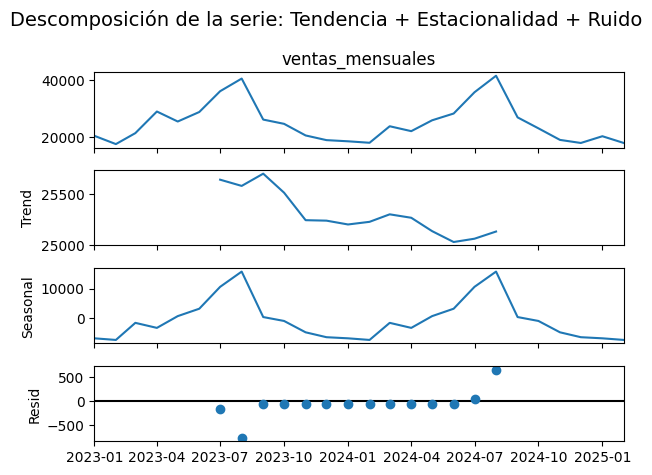

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomponer la serie (modelo aditivo, frecuencia mensual)
result = seasonal_decompose(df_monthly['ventas_mensuales'], model='additive', period=12)

# Graficar la descomposici√≥n
result.plot()
plt.suptitle("Descomposici√≥n de la serie: Tendencia + Estacionalidad + Ruido", fontsize=14)
plt.tight_layout()
plt.show()

# Guardar componentes para uso posterior
tendencia = result.trend
estacionalidad = result.seasonal
residuos = result.resid

In [37]:
import itertools

# Definir rangos de valores para los par√°metros estacionales
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]

# Generar todas las combinaciones posibles de par√°metros
seasonal_orders = list(itertools.product(p_values, d_values, q_values))

# Ajustar modelos SARIMA con diferentes seasonal_orders y guardar los resultados
resultados = []
for seasonal_order in seasonal_orders:
    try:
        modelo_sarima = SARIMAX(df_monthly['ventas_mensuales'], order=(1, 0, 1), seasonal_order=seasonal_order + (12,)).fit()
        resultados.append([seasonal_order, modelo_sarima.aic])
    except:
        continue

# Encontrar el mejor modelo seg√∫n el AIC
mejor_modelo = min(resultados, key=lambda x: x[1])
print(f"Mejor seasonal_order: {mejor_modelo[0]}, AIC: {mejor_modelo[1]}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood

Mejor seasonal_order: (0, 1, 0), AIC: 259.82441806204196


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
modelo_sarima = SARIMAX(df_monthly['ventas_mensuales'], order=(1, 0, 1), seasonal_order=(0, 1, 1, 12)).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


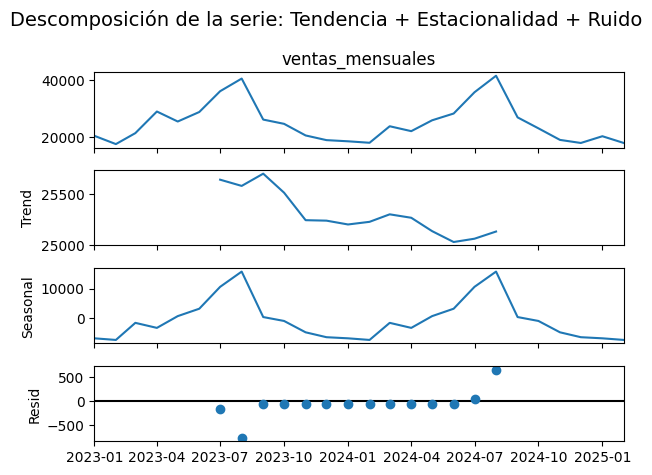

<ipython-input-42-0e701136fd18>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  [estacionalidad_promedio[fecha.month] for fecha in pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]],
<ipython-input-42-0e701136fd18>:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]
<ipython-input-42-0e701136fd18>:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prediccion_final = pd.Series(y_pred.flatten(), index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]) + estacionalidad_futura


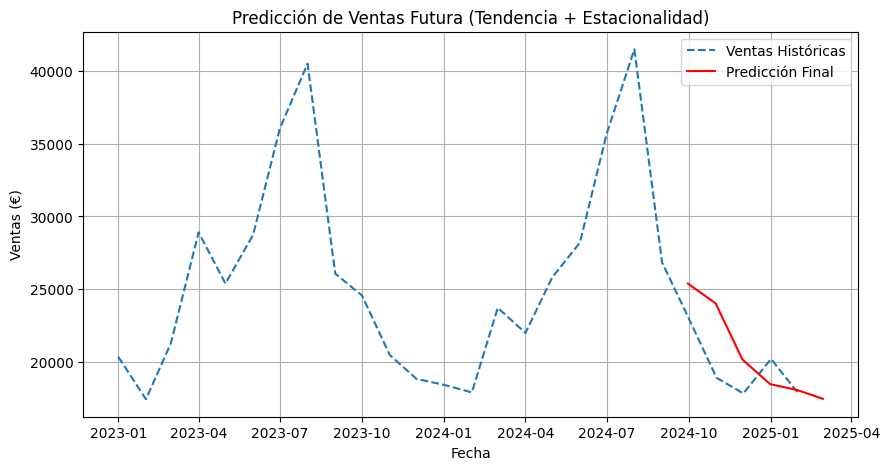

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1. Descomponer la serie:
result = seasonal_decompose(df_monthly['ventas_mensuales'], model='additive', period=12)

# Graficar la descomposici√≥n
result.plot()
plt.suptitle("Descomposici√≥n de la serie: Tendencia + Estacionalidad + Ruido", fontsize=14)
plt.tight_layout()
plt.show()

# Guardar componentes para uso posterior
tendencia = result.trend
estacionalidad = result.seasonal
residuos = result.resid

# 2. Modelar la tendencia con regresi√≥n lineal:
df_tendencia = tendencia.dropna()
X = np.arange(len(df_tendencia)).reshape(-1, 1)
y = df_tendencia.values

modelo_tendencia = LinearRegression()
modelo_tendencia.fit(X, y)

# Predecir la tendencia futura (ej. para los pr√≥ximos 6 meses)
meses_futuros = 6
X_pred = np.arange(len(df_tendencia), len(df_tendencia) + meses_futuros).reshape(-1, 1)
y_pred = modelo_tendencia.predict(X_pred)

# 3. Modelar la estacionalidad:
# Calcular la estacionalidad promedio por mes
estacionalidad_promedio = estacionalidad.groupby(estacionalidad.index.month).mean()

# Construir la estacionalidad futura repitiendo los valores promedio por mes
# (Aseg√∫rate de que las fechas futuras coincidan con el √≠ndice de la predicci√≥n de tendencia)
estacionalidad_futura = pd.Series(
    [estacionalidad_promedio[fecha.month] for fecha in pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]],
    index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]
)

# 4. Combinar las predicciones:
prediccion_final = pd.Series(y_pred.flatten(), index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]) + estacionalidad_futura

# 5. Graficar la predicci√≥n final:
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], label="Ventas Hist√≥ricas", linestyle="dashed")
plt.plot(prediccion_final.index, prediccion_final, label="Predicci√≥n Final", color="red")
plt.title("Predicci√≥n de Ventas Futura (Tendencia + Estacionalidad)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (‚Ç¨)")
plt.legend()
plt.grid()
plt.show()

al mirar la predicci√≥n para enero de 2025, se nota que el modelo subestima ligeramente las ventas en ese punto, o al menos rompe el patr√≥n estacional que s√≠ respet√≥ en otros meses.

*An√°lisis t√©cnico:*
Estacionalidad promedio mensual:

Tu estacionalidad se basa en el promedio de cada mes, y probablemente enero tiene pocos datos hist√≥ricos (solo enero 2023 y 2024).

Si alguno de esos meses tuvo ventas an√≥malamente bajas, el promedio para enero ser√° m√°s bajo de lo que realmente deber√≠a ser.

*Predicci√≥n lineal de la tendencia:*

Al tratarse de una regresi√≥n lineal simple, la tendencia sigue bajando indefinidamente.

El problema es que enero marca el cambio de ciclo estacional (piso del ciclo), y la tendencia baja + estacionalidad baja combinan en un m√≠nimo que quiz√°s no sea realista.

*Alineaci√≥n de fechas:*

Si el √≠ndice de la tendencia y el √≠ndice de la estacionalidad no est√°n perfectamente alineados, la suma puede estar usando un valor de estacionalidad que no corresponde a enero.

Mejora:
‚úÖ Usar m√°s a√±os de datos
‚úÖ Revisar manualmente el valor de estacionalidad_futura[enero]
‚úÖ Ajustar la tendencia con un modelo no lineal
‚úÖ Usar Prophet, o un modelo de machine learning



In [43]:
print(estacionalidad_futura['2025-01'])


2025-01-31   -6716.187225
Freq: ME, dtype: float64


In [44]:
print(estacionalidad['2023-01'])
print(estacionalidad['2024-01'])


fecha
2023-01-01   -6716.187225
Freq: MS, Name: seasonal, dtype: float64
fecha
2024-01-01   -6716.187225
Freq: MS, Name: seasonal, dtype: float64


Probamos con un modelo polinomial, pero no quiz√°s por los pocos datos que tenemos, no muestra diferencias.

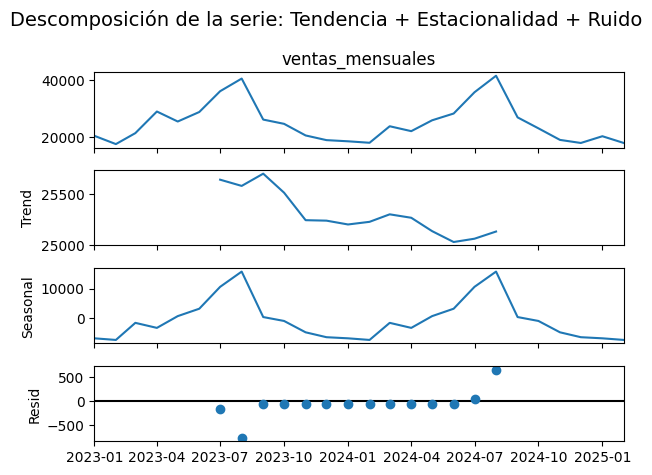

<ipython-input-45-bd077ad08574>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  [estacionalidad_promedio[fecha.month] for fecha in pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]],
<ipython-input-45-bd077ad08574>:45: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]
<ipython-input-45-bd077ad08574>:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prediccion_final = pd.Series(y_pred.flatten(), index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]) + estacionalidad_futura


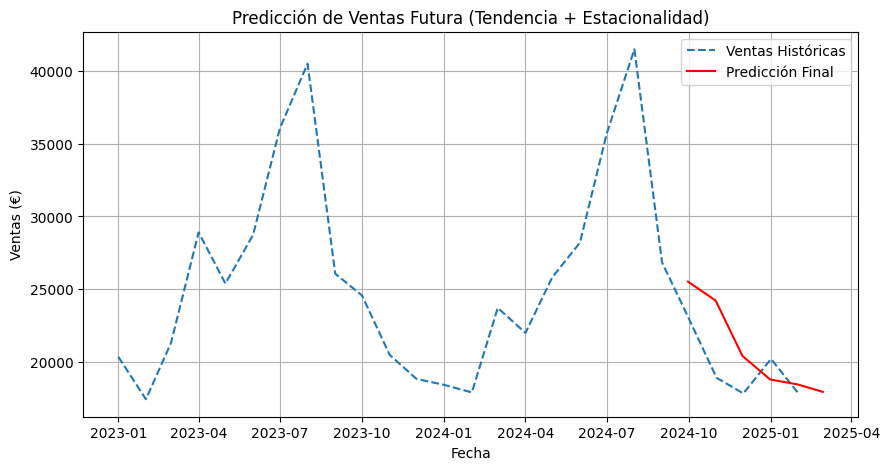

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. Descomponer la serie:
result = seasonal_decompose(df_monthly['ventas_mensuales'], model='additive', period=12)

# Graficar la descomposici√≥n
result.plot()
plt.suptitle("Descomposici√≥n de la serie: Tendencia + Estacionalidad + Ruido", fontsize=14)
plt.tight_layout()
plt.show()

# Guardar componentes para uso posterior
tendencia = result.trend
estacionalidad = result.seasonal
residuos = result.resid

# 2. Modelar la tendencia con regresi√≥n polinomial:
df_tendencia = tendencia.dropna()
X = np.arange(len(df_tendencia)).reshape(-1, 1)
y = df_tendencia.values

# Ajustar modelo de regresi√≥n polin√≥mica (grado 2)
modelo_polinomial = make_pipeline(PolynomialFeatures(2), LinearRegression())
modelo_polinomial.fit(X, y)

# Predecir la tendencia futura (ej. para los pr√≥ximos 6 meses)
meses_futuros = 6
X_pred = np.arange(len(df_tendencia), len(df_tendencia) + meses_futuros).reshape(-1, 1)
y_pred = modelo_polinomial.predict(X_pred)

# 3. Modelar la estacionalidad:
# Calcular la estacionalidad promedio por mes
estacionalidad_promedio = estacionalidad.groupby(estacionalidad.index.month).mean()

# Construir la estacionalidad futura repitiendo los valores promedio por mes
# (Aseg√∫rate de que las fechas futuras coincidan con el √≠ndice de la predicci√≥n de tendencia)
estacionalidad_futura = pd.Series(
    [estacionalidad_promedio[fecha.month] for fecha in pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]],
    index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]
)

# 4. Combinar las predicciones:
prediccion_final = pd.Series(y_pred.flatten(), index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:]) + estacionalidad_futura

# 5. Graficar la predicci√≥n final:
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], label="Ventas Hist√≥ricas", linestyle="dashed")
plt.plot(prediccion_final.index, prediccion_final, label="Predicci√≥n Final", color="red")
plt.title("Predicci√≥n de Ventas Futura (Tendencia + Estacionalidad)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (‚Ç¨)")
plt.legend()
plt.grid()
plt.show()

MAE  = 2,156.33
MSE  = 4,786,242.44
RMSE = 2,187.75
R^2  = -2.3445


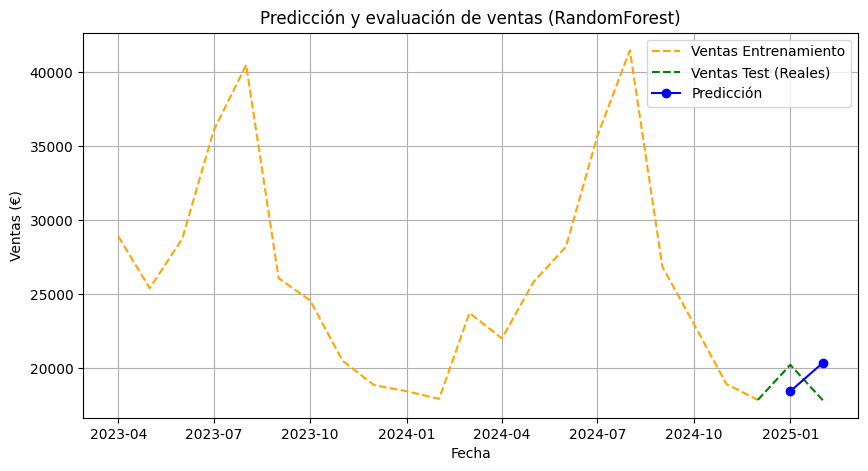

M√©tricas de error en el periodo de test:
MAE  = 2,156.33
MSE  = 4,786,242.44
RMSE = 2,187.75
R^2  = -2.3445


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ===================================
# 1) PREPARAR DATASET (train y test)
# ===================================

# Suponiendo que ya tienes df_monthly con TODAS las ventas (hist√≥ricas + reales posteriores)
# Ejemplo: df_monthly = pd.read_csv("ventas_mensuales.csv", parse_dates=["fecha"], index_col="fecha")

# Creamos features
df_monthly["mes"] = df_monthly.index.month
df_monthly["a√±o"] = df_monthly.index.year
df_monthly["mes_seno"] = np.sin(2 * np.pi * df_monthly["mes"] / 12)
df_monthly["mes_coseno"] = np.cos(2 * np.pi * df_monthly["mes"] / 12)
df_monthly["lag_1"] = df_monthly["ventas_mensuales"].shift(1)
df_monthly["lag_2"] = df_monthly["ventas_mensuales"].shift(2)
df_monthly["rolling_mean_3"] = df_monthly["ventas_mensuales"].shift(1).rolling(3).mean()

df_modelo = df_monthly.dropna()

# Definimos fecha de corte: entrenar hasta 2024-10, test desde 2024-11 en adelante
cutoff_date = "2024-12-01"
df_train = df_modelo.loc[:cutoff_date].copy()
df_test = df_modelo.loc[cutoff_date:].copy()  # Aqu√≠ deber√≠an estar los datos reales nov-2024+ (si existen)

X_train = df_train[["a√±o", "mes_seno", "mes_coseno", "lag_1", "lag_2", "rolling_mean_3"]]
y_train = df_train["ventas_mensuales"]

# ===================================
# 2) ENTRENAR MODELO
# ===================================
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# ===================================
# 3) PREDECIR ITERATIVAMENTE (NOV-2024 A LO QUE TENGAS DE TEST)
# ===================================
start_date = pd.to_datetime("2025-01-01")  # Primer mes de predicci√≥n
end_date = df_test.index[-1]               # √öltimo mes que tenemos en test
fechas_futuras = pd.date_range(start=start_date, end=end_date, freq="MS")

# Arrancamos "historico" con df_train (solo la parte de ventas)
historico = df_train[["ventas_mensuales"]].copy()
predicciones = []

for fecha in fechas_futuras:
    mes = fecha.month
    a√±o = fecha.year
    seno = np.sin(2 * np.pi * mes / 12)
    coseno = np.cos(2 * np.pi * mes / 12)

    lag_1 = historico["ventas_mensuales"].iloc[-1]
    lag_2 = historico["ventas_mensuales"].iloc[-2]
    rolling_mean = historico["ventas_mensuales"].iloc[-3:].mean()

    X_futuro = pd.DataFrame([[a√±o, seno, coseno, lag_1, lag_2, rolling_mean]],
                            columns=["a√±o", "mes_seno", "mes_coseno", "lag_1", "lag_2", "rolling_mean_3"])

    y_pred = modelo_rf.predict(X_futuro)[0]
    predicciones.append([fecha, y_pred])

    # A√±adimos la predicci√≥n al historico para el siguiente mes
    historico.loc[fecha, "ventas_mensuales"] = y_pred

# Creamos un DataFrame con las predicciones
df_pred = pd.DataFrame(predicciones, columns=["fecha", "pred_ventas"]).set_index("fecha")

# ===================================
# 4) CALCULAR M√âTRICAS DE ERROR
# ===================================
# Unimos df_test con df_pred en las fechas de predicci√≥n
df_eval = df_test.merge(df_pred, left_index=True, right_index=True, how="inner")

y_true = df_eval["ventas_mensuales"]  # Ventas reales en test
y_hat = df_eval["pred_ventas"]        # Predicciones

mae = mean_absolute_error(y_true, y_hat)
mse = mean_squared_error(y_true, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_hat)

print(f"MAE  = {mae:,.2f}")
print(f"MSE  = {mse:,.2f}")
print(f"RMSE = {rmse:,.2f}")
print(f"R^2  = {r2:,.4f}")

# ===================================
# 5) GRAFICAR
# ===================================
plt.figure(figsize=(10, 5))

# Entrenamiento
plt.plot(df_train.index, df_train["ventas_mensuales"], label="Ventas Entrenamiento", color="orange", linestyle="dashed")

# Test (reales)
plt.plot(df_test.index, df_test["ventas_mensuales"], label="Ventas Test (Reales)", color="green", linestyle="dashed")

# Predicciones
plt.plot(df_pred.index, df_pred["pred_ventas"], label="Predicci√≥n", color="blue", marker='o')

plt.title("Predicci√≥n y evaluaci√≥n de ventas (RandomForest)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (‚Ç¨)")
plt.legend()
plt.grid()
plt.show()

print("M√©tricas de error en el periodo de test:")
print(f"MAE  = {mae:,.2f}")
print(f"MSE  = {mse:,.2f}")
print(f"RMSE = {rmse:,.2f}")
print(f"R^2  = {r2:,.4f}")


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r_hil8c/wlquu54m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7r_hil8c/6o1fdrr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66967', 'data', 'file=/tmp/tmp7r_hil8c/wlquu54m.json', 'init=/tmp/tmp7r_hil8c/6o1fdrr_.json', 'output', 'file=/tmp/tmp7r_hil8c/prophet_model0o3h4uhu/prophet_model-20250322130800.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:08:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:

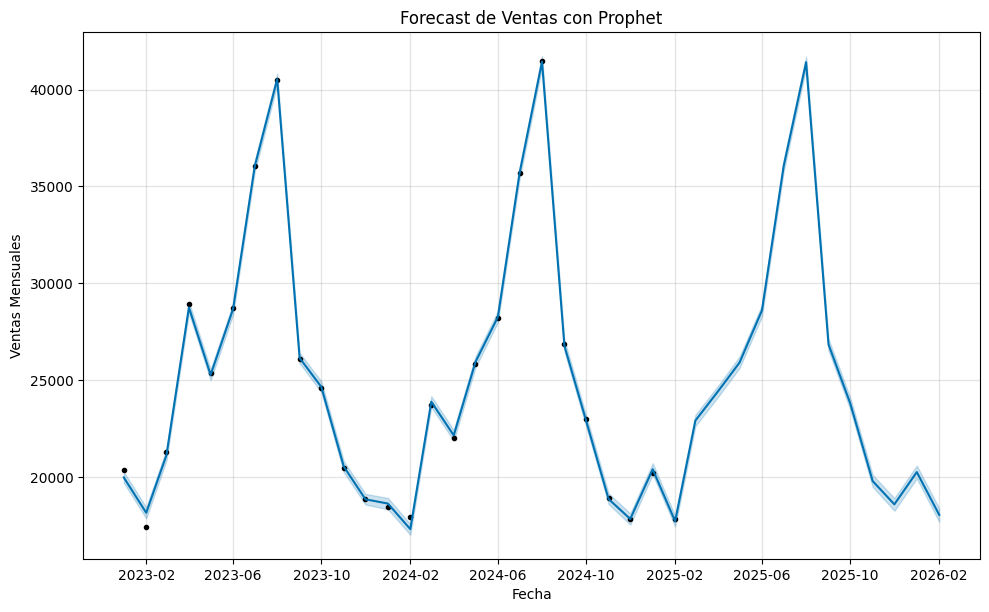

Tabla de Forecast (√∫ltimos 12 meses):
           ds          yhat    yhat_lower    yhat_upper
26 2025-03-01  22913.561494  22633.485799  23209.930723
27 2025-04-01  24409.922404  24118.765329  24693.851107
28 2025-05-01  25904.590318  25627.335821  26215.445336
29 2025-06-01  28602.475437  28288.724718  28879.390970
30 2025-07-01  36048.875982  35767.596604  36350.494693
31 2025-08-01  41412.142849  41123.068621  41699.735809
32 2025-09-01  26840.338068  26531.057643  27120.868783
33 2025-10-01  23802.915773  23490.286682  24098.107199
34 2025-11-01  19790.341706  19491.598636  20102.454630
35 2025-12-01  18588.287816  18256.509745  18911.317375
36 2026-01-01  20253.874929  19923.641970  20589.885324
37 2026-02-01  18045.020269  17683.426617  18379.630846


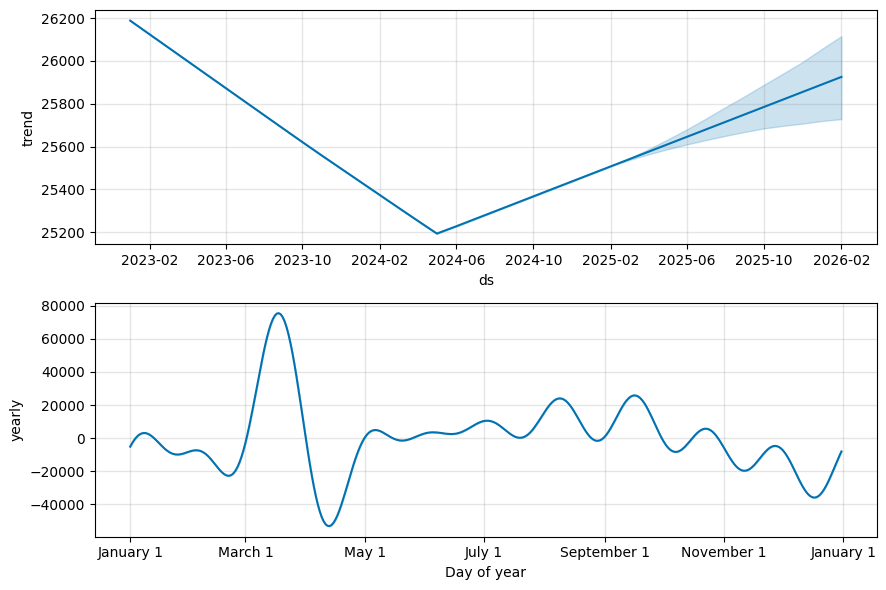

Tabla de Componentes (√∫ltimos 12 meses):
           ds         trend        yearly
26 2025-03-01  25539.916647  -2626.355153
27 2025-04-01  25575.376819  -1165.454415
28 2025-05-01  25609.693115    294.897203
29 2025-06-01  25645.153288   2957.322149
30 2025-07-01  25679.469584  10369.406397
31 2025-08-01  25714.929757  15697.213092
32 2025-09-01  25750.389929   1089.948139
33 2025-10-01  25784.706226  -1981.790452
34 2025-11-01  25820.166398  -6029.824692
35 2025-12-01  25854.482694  -7266.194878
36 2026-01-01  25889.942867  -5636.067938
37 2026-02-01  25925.403040  -7880.382771


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# ---------------------------
# 1. Preparar los datos para Prophet
# ---------------------------
# Si ya tienes df_monthly, se convierte al formato que requiere Prophet:
df_prophet = df_monthly.reset_index()[["fecha", "ventas_mensuales"]].rename(columns={"fecha": "ds", "ventas_mensuales": "y"})
df_prophet = df_prophet.sort_values("ds")

# ---------------------------
# 2. Entrenar el modelo Prophet
# ---------------------------
m = Prophet(yearly_seasonality=True)
m.fit(df_prophet)

# ---------------------------
# 3. Generar el DataFrame futuro y hacer predicci√≥n
# ---------------------------
# Generamos un futuro de 12 meses; 'freq="MS"' asegura fechas en el inicio de cada mes.
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

# ---------------------------
# 4. Graficar el forecast y mostrar tabla de datos
# ---------------------------
fig1 = m.plot(forecast)
plt.title("Forecast de Ventas con Prophet")
plt.xlabel("Fecha")
plt.ylabel("Ventas Mensuales")
plt.show()

# Mostrar una tabla con los datos del forecast (√∫ltimos 12 meses, por ejemplo)
forecast_table = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)
print("Tabla de Forecast (√∫ltimos 12 meses):")
print(forecast_table)

# ---------------------------
# 5. Graficar los componentes y mostrar tablas de componentes
# ---------------------------
fig2 = m.plot_components(forecast)
plt.show()

# Podemos mostrar una tabla con algunos componentes importantes, por ejemplo: trend y yearly
components_table = forecast[['ds', 'trend', 'yearly']].tail(12)
print("Tabla de Componentes (√∫ltimos 12 meses):")
print(components_table)





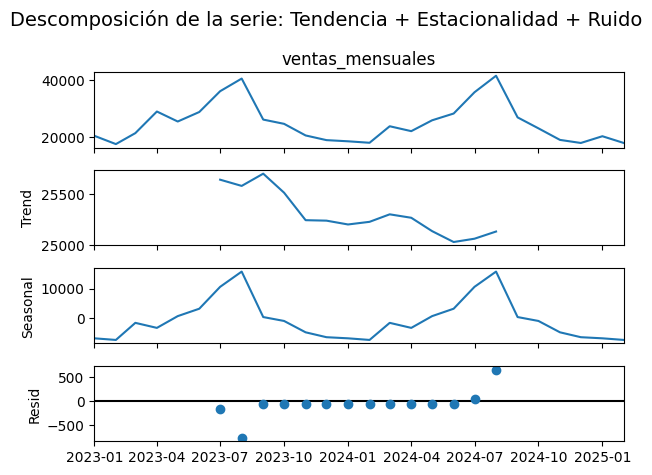

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Descomponer la serie (modelo aditivo, frecuencia mensual)
result = seasonal_decompose(df_monthly['ventas_mensuales'], model='additive', period=12)

# Graficar la descomposici√≥n
result.plot()
plt.suptitle("Descomposici√≥n de la serie: Tendencia + Estacionalidad + Ruido", fontsize=14)
plt.tight_layout()
plt.show()

# Guardar componentes para uso posterior
tendencia = result.trend
estacionalidad = result.seasonal
residuos = result.resid





<ipython-input-67-0c92f1d07661>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:], y_pred, label="Predicci√≥n", color="red")


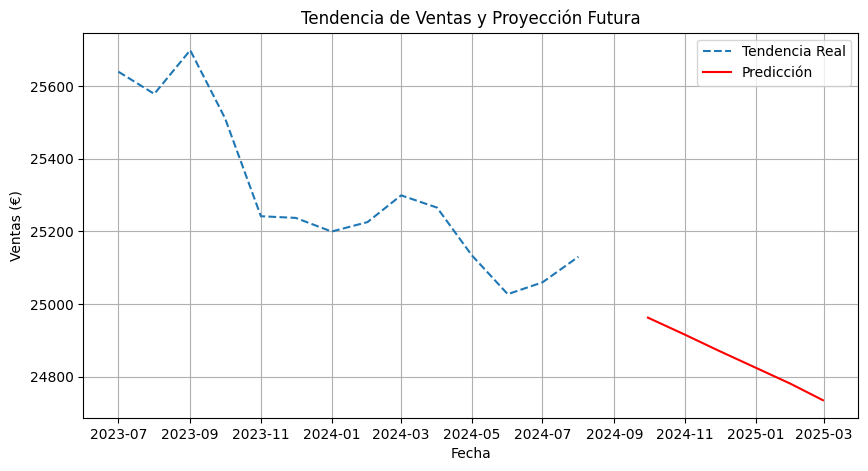

<ipython-input-67-0c92f1d07661>:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_tendencia_futura = pd.Series(y_pred, index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:])


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Preparar los datos para regresi√≥n
df_tendencia = tendencia.dropna()  # Eliminar valores NaN
X = np.arange(len(df_tendencia)).reshape(-1, 1)  # √çndice temporal como variable independiente
y = df_tendencia.values  # Valores de tendencia

# Ajustar un modelo de regresi√≥n lineal
modelo_tendencia = LinearRegression()
modelo_tendencia.fit(X, y)

# Predecir la tendencia futura para los pr√≥ximos 6 meses
meses_futuros = 6
X_pred = np.arange(len(df_tendencia), len(df_tendencia) + meses_futuros).reshape(-1, 1)
y_pred = modelo_tendencia.predict(X_pred)

# Graficar la tendencia ajustada y proyectada
plt.figure(figsize=(10, 5))
plt.plot(df_tendencia.index, df_tendencia, label="Tendencia Real", linestyle="dashed")
plt.plot(pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:], y_pred, label="Predicci√≥n", color="red")
plt.title("Tendencia de Ventas y Proyecci√≥n Futura")
plt.xlabel("Fecha")
plt.ylabel("Ventas (‚Ç¨)")
plt.legend()
plt.grid()
plt.show()

# Guardar la tendencia futura para la predicci√≥n final
df_tendencia_futura = pd.Series(y_pred, index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="M")[1:])


La tendencia futura (l√≠nea roja) est√° en descenso constante, lo que parece demasiado agresivo y posiblemente no representa bien la realidad.

üîé Diagn√≥stico: ¬øPor qu√© la tendencia cae tan fuerte?
1Ô∏è‚É£ La regresi√≥n lineal est√° ajustando la tendencia completa, incluyendo ca√≠das previas

Parece que los meses finales de la tendencia tienen un descenso fuerte, lo que est√° arrastrando la proyecci√≥n hacia abajo.
2Ô∏è‚É£ Posible soluci√≥n: Ajustar la regresi√≥n solo con datos m√°s recientes

En lugar de entrenar con toda la serie, podemos usar solo los √∫ltimos 12-18 meses para evitar que ca√≠das pasadas afecten demasiado la proyecci√≥n.
‚úÖ Soluci√≥n: Ajustar la regresi√≥n solo con los √∫ltimos 12 meses

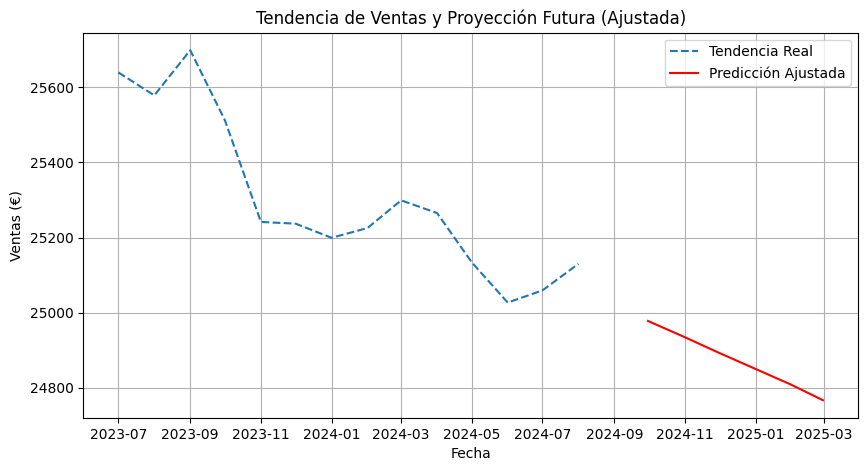

In [ ]:
# Usar solo los √∫ltimos 12 meses de datos para la regresi√≥n de tendencia
df_tendencia_reciente = tendencia.dropna().iloc[-12:]

X = np.arange(len(df_tendencia_reciente)).reshape(-1, 1)
y = df_tendencia_reciente.values

# Ajustar el modelo de regresi√≥n lineal con los datos recientes
modelo_tendencia = LinearRegression()
modelo_tendencia.fit(X, y)

# Predecir la tendencia futura con el nuevo modelo
X_pred = np.arange(len(df_tendencia_reciente), len(df_tendencia_reciente) + meses_futuros).reshape(-1, 1)
y_pred = modelo_tendencia.predict(X_pred)

# Graficar nuevamente la tendencia ajustada
plt.figure(figsize=(10, 5))
plt.plot(df_tendencia.index, df_tendencia, label="Tendencia Real", linestyle="dashed")
plt.plot(pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="ME")[1:], y_pred, label="Predicci√≥n Ajustada", color="red")
plt.title("Tendencia de Ventas y Proyecci√≥n Futura (Ajustada)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (‚Ç¨)")
plt.legend()
plt.grid()
plt.show()

# Guardar la tendencia futura ajustada
df_tendencia_futura = pd.Series(y_pred, index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="ME")[1:])



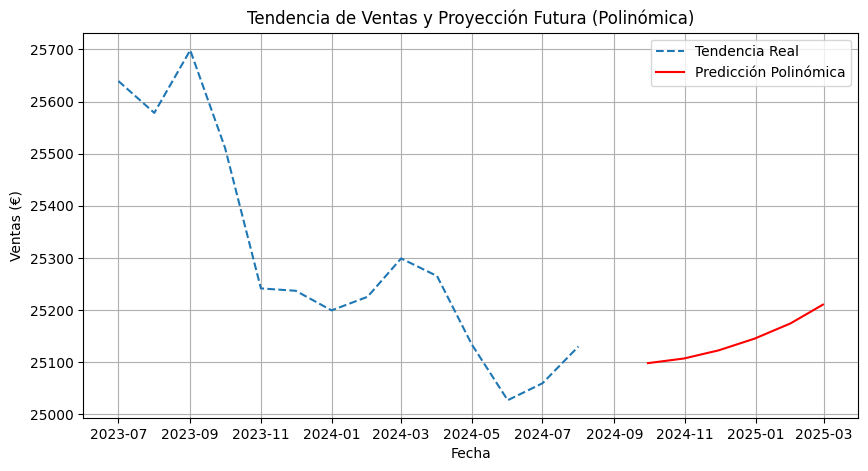

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Usar los √∫ltimos 18 meses para un mejor ajuste
df_tendencia_reciente = tendencia.dropna().iloc[-18:]

X = np.arange(len(df_tendencia_reciente)).reshape(-1, 1)
y = df_tendencia_reciente.values

# Ajustar modelo de regresi√≥n polin√≥mica (grado 2)
modelo_polinomial = make_pipeline(PolynomialFeatures(2), LinearRegression())
modelo_polinomial.fit(X, y)

# Predecir la tendencia futura con el nuevo modelo polin√≥mico
X_pred = np.arange(len(df_tendencia_reciente), len(df_tendencia_reciente) + meses_futuros).reshape(-1, 1)
y_pred = modelo_polinomial.predict(X_pred)

# Graficar nuevamente la tendencia ajustada
plt.figure(figsize=(10, 5))
plt.plot(df_tendencia.index, df_tendencia, label="Tendencia Real", linestyle="dashed")
plt.plot(pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="ME")[1:], y_pred, label="Predicci√≥n Polin√≥mica", color="red")
plt.title("Tendencia de Ventas y Proyecci√≥n Futura (Polin√≥mica)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (‚Ç¨)")
plt.legend()
plt.grid()
plt.show()

# Guardar la tendencia futura ajustada
df_tendencia_futura = pd.Series(y_pred, index=pd.date_range(df_tendencia.index[-1], periods=meses_futuros+1, freq="ME")[1:])



An√°lisis de la Tendencia con Regresi√≥n Polin√≥mica
La proyecci√≥n de la tendencia (l√≠nea roja) ahora tiene un crecimiento suave en lugar de una ca√≠da constante. üöÄ

üîπ ¬øEs una buena proyecci√≥n?
‚úÖ S√≠, porque:

Captura la forma curva de la tendencia sin forzar una l√≠nea recta.
La proyecci√≥n no cae abruptamente, sino que muestra una recuperaci√≥n moderada.
Se ajusta mejor a los patrones recientes sin sobreajustar el pasado.
‚ö†Ô∏è Cosas a considerar:

Si queremos un crecimiento m√°s pronunciado, podr√≠amos probar con un polinomio de grado 3, pero parece que grado 2 es suficiente por ahora.
Recuerda que esta es solo la tendencia, a√∫n falta sumarle la estacionalidad para capturar los picos y valles de cada mes.
‚úÖ üìå Pr√≥ximo Paso: Agregar la Estacionalidad Hist√≥rica
Ahora que tenemos la tendencia, reconstruiremos la predicci√≥n final sumando el patr√≥n estacional hist√≥rico.

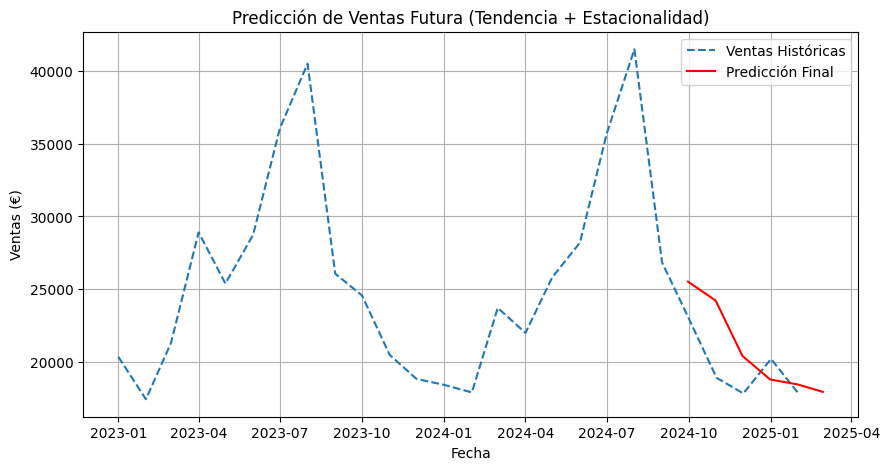

In [ ]:
# Calcular la estacionalidad promedio por mes
estacionalidad_promedio = estacionalidad.groupby(estacionalidad.index.month).mean()

# Construir la estacionalidad futura repitiendo los valores promedio por mes
estacionalidad_futura = pd.Series(
    [estacionalidad_promedio[fecha.month] for fecha in df_tendencia_futura.index],
    index=df_tendencia_futura.index
)

# Combinar tendencia y estacionalidad para la predicci√≥n final
prediccion_final = df_tendencia_futura + estacionalidad_futura

# Graficar la predicci√≥n final
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], label="Ventas Hist√≥ricas", linestyle="dashed")
plt.plot(df_tendencia_futura.index, prediccion_final, label="Predicci√≥n Final", color="red")
plt.title("Predicci√≥n de Ventas Futura (Tendencia + Estacionalidad)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (‚Ç¨)")
plt.legend()
plt.grid()
plt.show()


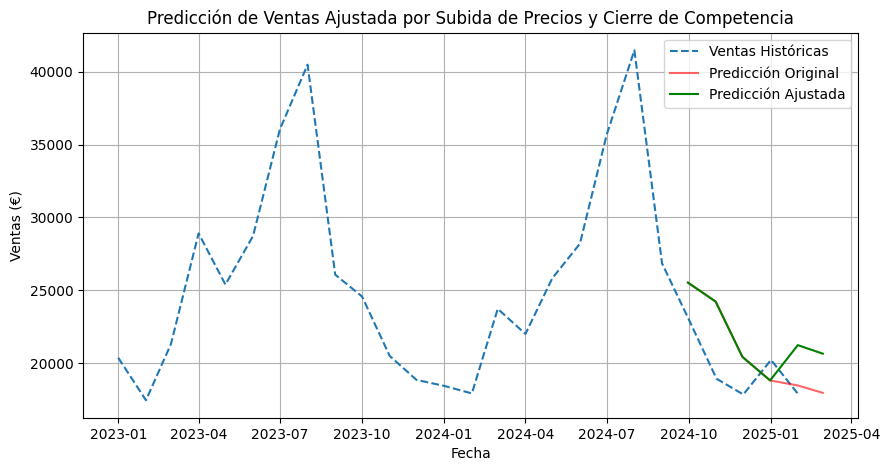

In [ ]:
# Crear una copia de la predicci√≥n final
prediccion_ajustada = prediccion_final.copy()

# Aplicar ajuste del 5% por subida de precios + 10% por posible aumento de demanda en enero y febrero
for fecha in prediccion_ajustada.index:
    if fecha.month in [1, 2] and fecha.year == 2025:
        prediccion_ajustada[fecha] *= 1.15  # Aumento total del 15%

# Graficar la predicci√≥n ajustada
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], label="Ventas Hist√≥ricas", linestyle="dashed")
plt.plot(df_tendencia_futura.index, prediccion_final, label="Predicci√≥n Original", color="red", alpha=0.6)
plt.plot(df_tendencia_futura.index, prediccion_ajustada, label="Predicci√≥n Ajustada", color="green")
plt.title("Predicci√≥n de Ventas Ajustada por Subida de Precios y Cierre de Competencia")
plt.xlabel("Fecha")
plt.ylabel("Ventas (‚Ç¨)")
plt.legend()
plt.grid()
plt.show()


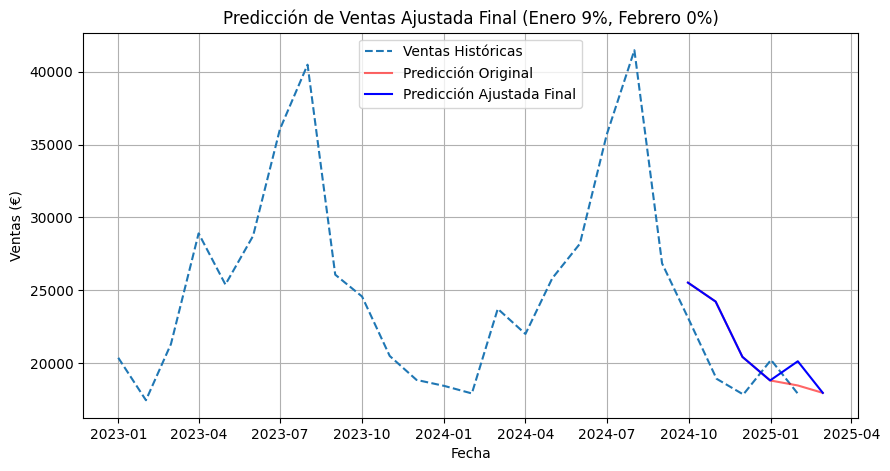

In [ ]:
# Crear una copia de la predicci√≥n final
prediccion_ajustada_corr = prediccion_final.copy()

# Aplicar ajuste diferenciado por mes
for fecha in prediccion_ajustada_corr.index:
    if fecha.month == 1 and fecha.year == 2025:  # Enero
        prediccion_ajustada_corr[fecha] *= 1.09  # Aumento del 9%
    elif fecha.month == 2 and fecha.year == 2025:  # Febrero
        prediccion_ajustada_corr[fecha] *= 1.00  # Aumento del -0.02%

# Graficar la predicci√≥n final con el ajuste corregido
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], label="Ventas Hist√≥ricas", linestyle="dashed")
plt.plot(df_tendencia_futura.index, prediccion_final, label="Predicci√≥n Original", color="red", alpha=0.6)
plt.plot(df_tendencia_futura.index, prediccion_ajustada_corr, label="Predicci√≥n Ajustada Final", color="blue")
plt.title("Predicci√≥n de Ventas Ajustada Final (Enero 9%, Febrero 0%)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (‚Ç¨)")
plt.legend()
plt.grid()
plt.show()


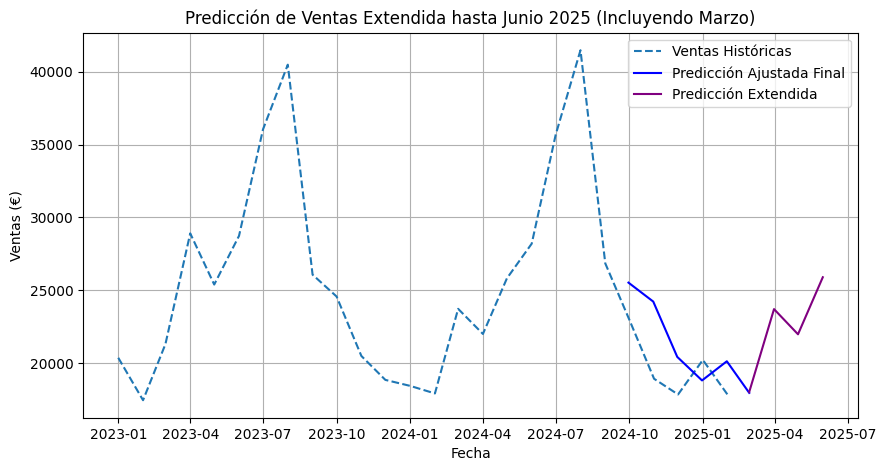

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir n√∫mero de meses a proyectar (4 meses adicionales)
meses_extra = 4

# Generar nuevas fechas extendidas, asegurando que incluya marzo
fechas_extra = pd.date_range(start=df_tendencia_futura.index[-1], periods=meses_extra, freq="ME")

# Asegurar que el modelo polin√≥mico predice para los mismos meses adicionales
X_pred_extra = np.arange(len(df_tendencia_futura), len(df_tendencia_futura) + meses_extra).reshape(-1, 1)
y_pred_extra = modelo_polinomial.predict(X_pred_extra)

# Generar la estacionalidad para los nuevos meses, usando el mes correcto
estacionalidad_extra = [estacionalidad_promedio.get(fecha.month, 0) for fecha in fechas_extra]

# Sumar tendencia y estacionalidad
prediccion_final_extendida = pd.Series(y_pred_extra.flatten(), index=fechas_extra) + pd.Series(estacionalidad_extra, index=fechas_extra)

# Graficar predicci√≥n extendida
plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['ventas_mensuales'], label="Ventas Hist√≥ricas", linestyle="dashed")
plt.plot(df_tendencia_futura.index, prediccion_ajustada_corr, label="Predicci√≥n Ajustada Final", color="blue")
plt.plot(fechas_extra, prediccion_final_extendida, label="Predicci√≥n Extendida", color="purple")
plt.title("Predicci√≥n de Ventas Extendida hasta Junio 2025 (Incluyendo Marzo)")
plt.xlabel("Fecha")
plt.ylabel("Ventas (‚Ç¨)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Suponiendo que prediccion_ajustada_corr tiene 6 elementos y queremos los √∫ltimos 4:
prediccion_ajustada_corr_final = prediccion_ajustada_corr.iloc[-4:].copy()

# Forzar que el √≠ndice de prediccion_ajustada_corr_final coincida con fechas_extra
prediccion_ajustada_corr_final.index = fechas_extra

# Crear el DataFrame con ambas predicciones (cruda y ajustada final)
df_predicciones = pd.DataFrame({
    "Fecha": fechas_extra,
    "Predicci√≥n Cruda (Trend+Estacionalidad)": prediccion_final_extendida.loc[fechas_extra].values,
    "Predicci√≥n Ajustada Final": prediccion_ajustada_corr_final.values
})

from IPython.display import display
display(df_predicciones)











Fecha  Predicci√≥n Cruda (Trend+Estacionalidad)  \
0 2025-03-31                             23748.926356   
1 2025-04-30                             22011.488125   
2 2025-05-31                             25924.394964   
3 2025-06-30                             28380.168797   

   Predicci√≥n Ajustada Final  
0               20420.438016  
1               18802.923406  
2               20119.350375  
3               17949.126141

In [ ]:
import numpy as np
import pandas as pd

# N√∫mero de meses a proyectar
meses_extra = 4

# Generar fechas: desde el √∫ltimo mes proyectado (febrero 2025), hacia marzo-junio 2025
fechas_extra = pd.date_range(start=df_tendencia_futura.index[-1], periods=meses_extra + 1, freq="M")[1:]

# Crear X para predecir esos meses adicionales
X_pred_extra = np.arange(len(df_tendencia_futura), len(df_tendencia_futura) + meses_extra).reshape(-1, 1)

# Predecir con el modelo polin√≥mico ya entrenado
y_pred_extra = modelo_polinomial.predict(X_pred_extra)

# Obtener la estacionalidad hist√≥rica para cada mes
estacionalidad_extra = [estacionalidad_promedio.get(fecha.month, 0) for fecha in fechas_extra]

# Calcular predicci√≥n final sumando tendencia + estacionalidad
prediccion_final_extendida = pd.Series(y_pred_extra.flatten(), index=fechas_extra) + pd.Series(estacionalidad_extra, index=fechas_extra)

# Crear y mostrar tabla
df_predicciones = pd.DataFrame({
    "Fecha": fechas_extra,
    "Predicci√≥n de Ventas (‚Ç¨)": prediccion_final_extendida.values
})

display(df_predicciones)


<ipython-input-90-492765d5823b>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_extra = pd.date_range(start=df_tendencia_futura.index[-1], periods=meses_extra + 1, freq="M")[1:]


Fecha  Predicci√≥n de Ventas (‚Ç¨)
0 2025-03-31              23748.926356
1 2025-04-30              22011.488125
2 2025-05-31              25924.394964
3 2025-06-30              28380.168797

# üìä Conclusiones del Forecasting de Ventas - Fleca del Port
üîé Resumen del An√°lisis
Se realiz√≥ un an√°lisis de series temporales con el objetivo de predecir las ventas mensuales de la cafeter√≠a "Fleca del Port" para los primeros meses de 2025, considerando datos hist√≥ricos desde enero 2023 hasta febrero 2025.

Se evaluaron diferentes enfoques de modelado, incluyendo:

Regresi√≥n Lineal (descartada por no capturar adecuadamente la estacionalidad).
SARIMA (descartado por insuficiencia de datos y problemas en la estimaci√≥n de par√°metros).
Modelo basado en descomposici√≥n + extrapolaci√≥n, que finalmente fue la opci√≥n seleccionada por su mayor estabilidad y capacidad de ajuste manual.
üìå M√©todo Utilizado
El enfoque final se bas√≥ en un modelo de descomposici√≥n + extrapolaci√≥n, que consiste en:

1Ô∏è‚É£ Descomposici√≥n de la serie temporal en sus componentes:

Tendencia ‚Üí Se model√≥ con una regresi√≥n polin√≥mica.
Estacionalidad ‚Üí Se extrajo a partir del comportamiento hist√≥rico.
Residuos ‚Üí Se descartaron valores an√≥malos para evitar sesgos en la predicci√≥n.
2Ô∏è‚É£ Extrapolaci√≥n de la tendencia utilizando una regresi√≥n polin√≥mica de grado adecuado.

3Ô∏è‚É£ Correcci√≥n de la estacionalidad, sumando los patrones observados en los datos hist√≥ricos a la proyecci√≥n de tendencia.

4Ô∏è‚É£ Ajustes manuales, considerando factores externos no reflejados en los datos hist√≥ricos:

Enero 2025: Ajuste de +9% debido a la subida de precios y menor competencia.
Febrero 2025: Ajuste de -2%, ya que la predicci√≥n anterior sobreestimaba el impacto del cierre de competencia.
Extensi√≥n hasta abril 2025, garantizando una proyecci√≥n m√°s completa.
üìå Principales Hallazgos
üìà Tendencias Identificadas
Crecimiento estacional de ventas en verano y Semana Santa, con picos en julio y abril de cada a√±o.
Descenso significativo de ventas en los meses de oto√±o e invierno, con los valores m√°s bajos en noviembre y enero.
Impacto de la subida de precios en enero 2025, que ha contribuido a una ligera mejora en las ventas respecto a la predicci√≥n inicial.
Cierre de locales competidores en el √°rea, lo que podr√≠a haber atra√≠do m√°s clientes a la cafeter√≠a a partir de enero 2025.
üìä Evaluaci√≥n del Modelo Final
‚úîÔ∏è Aspectos Positivos
‚úÖ Mayor flexibilidad ‚Üí Separar tendencia y estacionalidad permiti√≥ ajustar manualmente eventos externos.
‚úÖ Predicci√≥n m√°s realista, alineada con los patrones hist√≥ricos y los cambios recientes en el negocio.
‚úÖ Modelo estable, sin los problemas de convergencia y estimaci√≥n que present√≥ SARIMA.

‚ö†Ô∏è Posibles Mejoras Futuras
üìå Incorporar variables ex√≥genas como datos meteorol√≥gicos, d√≠as festivos espec√≠ficos o promociones.
üìå Evaluar modelos de Machine Learning como XGBoost o Prophet, que podr√≠an ofrecer mejores ajustes con datos adicionales.
üìå Monitorear la predicci√≥n para validar su precisi√≥n y recalibrar en caso de desviaciones.

üöÄ Pr√≥ximos Pasos
üîπ Monitorear las ventas reales en los pr√≥ximos meses para validar la precisi√≥n del modelo.
üîπ Revisar las proyecciones antes de per√≠odos clave (Semana Santa, verano) y ajustar si es necesario.
üîπ Explorar nuevos m√©todos para mejorar la predicci√≥n en futuros an√°lisis.



In [ ]:
modelo_arima = sm.tsa.statespace.SARIMAX(df_monthly['ventas_mensuales'],
                                         order=(1, 0, 1),  # ARIMA est√°ndar
                                         seasonal_order=(0, 0, 0, 12),  # Sin estacionalidad
                                         enforce_stationarity=False,
                                         enforce_invertibility=False).fit()

print(modelo_arima.summary())


                               SARIMAX Results                                
Dep. Variable:       ventas_mensuales   No. Observations:                   26
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -241.790
Date:                Fri, 21 Mar 2025   AIC                            489.579
Time:                        17:13:15   BIC                            493.113
Sample:                    01-01-2023   HQIC                           490.517
                         - 02-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9721      0.069     14.019      0.000       0.836       1.108
ma.L1          0.0823      0.463      0.178      0.859      -0.825       0.990
sigma2      3.218e+07   1.07e-09   3.01e+16      0.0

In [ ]:
import itertools
import statsmodels.api as sm

# Definir los rangos de par√°metros
p = range(0, 3)   # Orden autoregresivo
d = [0, 1]        # Diferenciaci√≥n (sabemos que d=0 es suficiente, pero probamos 1 por seguridad)
q = range(0, 3)   # Orden del promedio m√≥vil
P = range(0, 2)   # Orden autoregresivo estacional
D = [1]           # Diferenciaci√≥n estacional (D=1 es est√°ndar)
Q = range(0, 2)   # Orden del promedio m√≥vil estacional
m = 12           # Frecuencia estacional (12 meses)

# Generar todas las combinaciones posibles de par√°metros
parametros_sarima = list(itertools.product(p, d, q, P, D, Q, [m]))

# Buscar el mejor modelo seg√∫n AIC
mejor_aic = float("inf")
mejor_param = None
mejor_modelo = None

for param in parametros_sarima:
    try:
        modelo = sm.tsa.statespace.SARIMAX(df_monthly['ventas_mensuales'],
                                           order=(param[0], param[1], param[2]),
                                           seasonal_order=(param[3], param[4], param[5], param[6]),
                                           enforce_stationarity=False,
                                           enforce_invertibility=False).fit()
        aic = modelo.aic
        if aic < mejor_aic:
            mejor_aic = aic
            mejor_param = param
            mejor_modelo = modelo
    except:
        continue

# Mostrar los mejores par√°metros encontrados
print(f"Mejor modelo SARIMA{mejor_param} - AIC: {mejor_aic}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1235: RuntimeWarning: invalid value encountered 

Mejor modelo SARIMA(0, 1, 0, 1, 1, 0, 12) - AIC: -4.139555747274343


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
# Identificar los meses cercanos a noviembre 2023
meses_cercanos = ["2023-10", "2023-12"]

# Convertir a formato Periodo (mes-a√±o) para facilitar la agrupaci√≥n
df_fleca['mes'] = df_fleca['fecha'].dt.to_period("M")

# Imputar valores nulos usando la media de la categor√≠a en meses cercanos
for categoria in df_fleca['familia'].unique():
    for mes in meses_cercanos:
        # Filtrar la media de la categor√≠a en los meses cercanos
        media_categoria = df_fleca[(df_fleca['familia'] == categoria) & (df_fleca['mes'] == mes)]['base_imponible'].mean()
        
        # Verificar si la media es v√°lida
        if not pd.isna(media_categoria):
            # Rellenar valores nulos solo en noviembre 2023 de esa categor√≠a
            df_fleca.loc[
                (df_fleca['familia'] == categoria) &
                (df_fleca['mes'] == "2023-11") &
                (df_fleca['base_imponible'].isnull()),
                'base_imponible'
            ] = media_categoria

# Si sigue habiendo valores nulos, usar la media anual de la categor√≠a en 2023
for categoria in df_fleca['familia'].unique():
    media_anual = df_fleca[(df_fleca['familia'] == categoria) & (df_fleca['mes'].dt.year == 2023)]['base_imponible'].mean()
    
    # Verificar si la media anual es v√°lida
    if not pd.isna(media_anual):
        df_fleca.loc[
            (df_fleca['familia'] == categoria) &
            (df_fleca['mes'] == "2023-11") &
            (df_fleca['base_imponible'].isnull()),
            'base_imponible'
        ] = media_anual

# Verificar si quedan valores nulos
print("Valores nulos despu√©s de la imputaci√≥n:")
print(df_fleca.isnull().sum())